In [1]:
cd ~/projects/exSEEK_training/

/home/chenxupeng/projects/exSEEK_training


In [2]:
import gc, argparse, sys, os, errno
from functools import reduce
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc,precision_recall_curve,average_precision_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
np.random.seed(1234)
import IPython
from IPython.display import IFrame

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

# prerequisite

## load plotting functions
embed pdf; std_plot; display dataframe

In [3]:
#setup figure template
figure_template_path = 'bin'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
#force reload of the module
reload(figure_template)
from figure_template import display_dataframe, embed_pdf_figure, embed_pdf_pages,std_plot,legendhandle

## matrix manipulating using Numpy

http://cs231n.github.io/python-numpy-tutorial/

In [4]:
a = np.array([1, 2, 3])   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(3,)"
print(a[0], a[1], a[2])   # Prints "1 2 3"
a[0] = 5                  # Change an element of the array
print(a)                  # Prints "[5, 2, 3]"

b = np.array([[1,2,3],[4,5,6]])    # Create a rank 2 array
print(b.shape)                     # Prints "(2, 3)"
print(b[0, 0], b[0, 1], b[1, 0])   # Prints "1 2 4"

<class 'numpy.ndarray'>
(3,)
1 2 3
[5 2 3]
(2, 3)
1 2 4


In [5]:
a = np.zeros((2,2))   # Create an array of all zeros
print(a)              # Prints "[[ 0.  0.]
                      #          [ 0.  0.]]"

b = np.ones((1,2))    # Create an array of all ones
print(b)              # Prints "[[ 1.  1.]]"

c = np.full((2,2), 7)  # Create a constant array
print(c)               # Prints "[[ 7.  7.]
                       #          [ 7.  7.]]"

d = np.eye(2)         # Create a 2x2 identity matrix
print(d)              # Prints "[[ 1.  0.]
                      #          [ 0.  1.]]"

e = np.random.random((2,2))  # Create an array filled with random values
print(e)                     # Might print "[[ 0.91940167  0.08143941]
                             #               [ 0.68744134  0.87236687]]"

[[0. 0.]
 [0. 0.]]
[[1. 1.]]
[[7 7]
 [7 7]]
[[1. 0.]
 [0. 1.]]
[[0.19151945 0.62210877]
 [0.43772774 0.78535858]]


In [6]:
np.eye(15)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0.

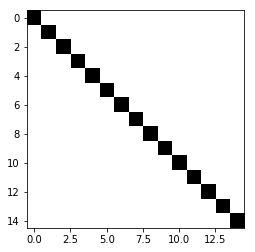

In [7]:
imshow(np.eye(15),cmap=cm.gray_r)

In [8]:
np.random.random(100).reshape(10,10).shape

(10, 10)

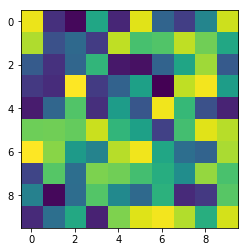

In [9]:
imshow(np.random.random(100).reshape(10,10))

### some exercise

#### Create a full-zero vector of size 10 (★☆☆)

In [10]:
Z = np.zeros(10)
print(Z)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


#### Create a null vector of size 10 but the fifth value which is 1 (★☆☆)

In [11]:
Z = np.zeros(10)
Z[4] = 1
print(Z)

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#### Create a vector with values ranging from 10 to 49 (★☆☆)

In [12]:
Z = np.arange(10,50)
print(Z)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


#### Reverse a vector (first element becomes last) (★☆☆)

In [13]:
Z = np.arange(50)
print(Z)
Z = Z[::-1]
print(Z)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27 26
 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3  2
  1  0]


#### Create a 3x3 matrix with values ranging from 0 to 8 (★☆☆)

In [14]:
Z = np.arange(9).reshape(3,3)
print(Z)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


#### Find indices of non-zero elements from \[1,2,0,0,4,0\] (★☆☆)

In [15]:
nz = np.nonzero([1,2,0,0,4,0])
print(nz)

(array([0, 1, 4]),)


#### Create a 3x3 identity matrix (★☆☆)

In [16]:
Z = np.eye(3)
print(Z)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


#### Create a 3x3x3 array with random values (★☆☆)

In [17]:
Z = np.random.random((3,3,3))
print(Z)

[[[0.72478995 0.71667789 0.04107857]
  [0.43948178 0.28206978 0.33499597]
  [0.08352701 0.76084915 0.50927245]]

 [[0.66104742 0.63031444 0.37092683]
  [0.44674015 0.41510822 0.48038851]
  [0.98332357 0.37342371 0.01240698]]

 [[0.92190334 0.87327607 0.35174682]
  [0.63013311 0.35782696 0.21281994]
  [0.22331922 0.41956379 0.07291022]]]


#### Create a 10x10 array with random values and find the minimum and maximum values (★☆☆)

In [18]:
Z = np.random.random((10,10))
Zmin, Zmax = Z.min(), Z.max()
print(Zmin, Zmax)

0.0021894308231216186 0.9902040600853143


#### Create a random vector of size 30 and find the mean value (★☆☆)

In [19]:
Z = np.random.random(30)
m = Z.mean()
print(m)

0.5921048888935069


#### 15. Create a 2d array with 1 on the border and 0 inside (★☆☆)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


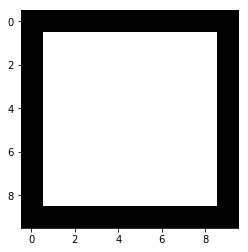

In [20]:
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
print(Z)
imshow(Z,cmap=cm.gray_r)

#### How to add a border (filled with 0's) around an existing array? (★☆☆)

[[0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]


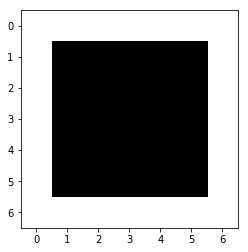

In [21]:
Z = np.ones((5,5))
Z = np.pad(Z, pad_width=1, mode='constant', constant_values=0)
print(Z)
imshow(Z,cmap=cm.gray_r)

#### Create a 5x5 matrix with values 1,2,3,4 just below the diagonal (★☆☆)

[[0 0 0 0 0]
 [1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]]


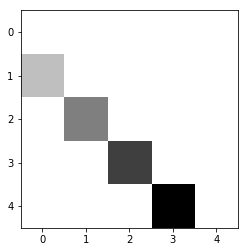

In [22]:
Z = np.diag(1+np.arange(4),k=-1)
print(Z)
imshow(Z,cmap=cm.gray_r)

#### Create a 8x8 matrix and fill it with a checkerboard pattern (★☆☆)

[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


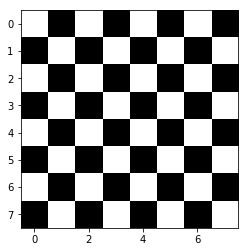

In [23]:
Z = np.zeros((8,8),dtype=int)
Z[1::2,::2] = 1
Z[::2,1::2] = 1
print(Z)
imshow(Z,cmap=cm.gray_r)

#### 22. Normalize a 5x5 random matrix (★☆☆)
$$
Z^{'} = \frac{Z-\mu}{\sigma}
$$

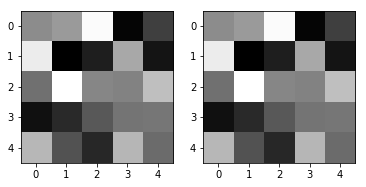

In [24]:
fig,ax = plt.subplots(1,2,figsize=(6,3))
Z = np.random.random((5,5))
ax[0].imshow(Z,cmap=cm.gray_r)
Z = (Z - np.mean (Z)) / (np.std (Z))
ax[1].imshow(Z,cmap=cm.gray_r)

#### Multiply a 5x3 matrix by a 3x2 matrix (real matrix product) (★☆☆)

In [25]:
a ,b = np.tile(np.eye(2),(4,4)),np.tile(np.eye(2),(4,4))[:,:2]

[[4. 0.]
 [0. 4.]
 [4. 0.]
 [0. 4.]
 [4. 0.]
 [0. 4.]
 [4. 0.]
 [0. 4.]]


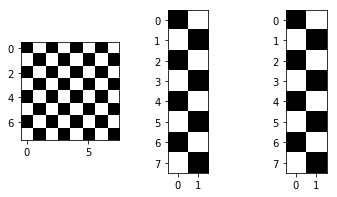

In [26]:
Z = np.dot(a ,b)
print(Z)

# Alternative solution, in Python 3.5 and above
Z = a @ b

fig,ax = plt.subplots(1,3,figsize=(6,3))
ax[0].imshow(a,cmap=cm.gray_r)
ax[1].imshow(b,cmap=cm.gray_r)
ax[2].imshow(Z,cmap=cm.gray_r)                          

#### Given a 1D array, negate all elements which are between 3 and 8, in place. (★☆☆)

In [27]:
Z = np.arange(11)
Z[(3 < Z) & (Z <= 8)] *= -1
print(Z)

[ 0  1  2  3 -4 -5 -6 -7 -8  9 10]


#### How to round away from zero a float array ? (★☆☆)

In [28]:
# Author: Charles R Harris
Z = np.random.uniform(-10,+10,10)
print (Z)
print (np.copysign(np.ceil(np.abs(Z)), Z))

[-8.0334294   4.2727335   7.68081188  1.34108842  9.88963158 -6.42520459
 -9.75599827 -0.86003039  8.63503884  6.92049376]
[ -9.   5.   8.   2.  10.  -7. -10.  -1.   9.   7.]


#### How to find common values between two arrays? (★☆☆)

In [29]:
Z1 = np.random.randint(0,10,10)
Z2 = np.random.randint(0,10,10)
print(Z1,Z2,np.intersect1d(Z1,Z2))

[6 5 1 6 0 9 2 2 1 4] [9 9 6 6 2 4 1 5 5 5] [1 2 4 5 6 9]


#### Create a 5x5 matrix with row values ranging from 0 to 4 (★★☆)

In [30]:
Z = np.zeros((5,5))
Z += np.arange(5)  # which is called broadcasting
print(Z)

[[0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]
 [0. 1. 2. 3. 4.]]


#### Create a random vector of size 10 and sort it (★★☆)

In [31]:
Z = np.random.random(10)
print(Z,Z.argsort())
Z.sort()
print(Z,Z.argsort())

[0.69920706 0.29864068 0.86160962 0.9058072  0.76858325 0.26123164
 0.9384556  0.93864246 0.74504455 0.91073504] [5 1 0 8 4 2 3 9 6 7]
[0.26123164 0.29864068 0.69920706 0.74504455 0.76858325 0.86160962
 0.9058072  0.91073504 0.9384556  0.93864246] [0 1 2 3 4 5 6 7 8 9]


#### Create random vector of size 10 and replace the maximum value by 0 (★★☆)

In [32]:
Z = np.random.random(10)
Z[Z.argmax()] = 0
print(Z)

[0.23722471 0.49496735 0.80987834 0.         0.63748325 0.91084975
 0.69213675 0.04294299 0.8335869  0.36994852]


# PCA&t-SNE visualization

## PCA (principle component analysis)
- 通过线性组合得到贡献最大的、可解释的变量(principle components)
- 数据的降维和可视化

[PCA](https://zhuanlan.zhihu.com/p/37777074)<br>
[SVD](https://mp.weixin.qq.com/s/Dv51K8JETakIKe5dPBAPVg)<br>
[Hinton理解的PCA](https://www.jianshu.com/p/76c64cd0b5ad)<br>
[PCA和SVD的区别与联系](https://blog.csdn.net/wangjian1204/article/details/50642732)

PCA的主要思想是将n维特征映射到k维上，这k维是新的彼此正交的特征，也被称为主成分。PCA的工作就是从原始的空间中顺序地找一组相互正交的坐标轴，新的坐标轴的选择与数据本身密切相关。其中，第一个新坐标轴选择是原始数据中方差最大的方向，第二个新坐标轴选取是与第一个坐标轴正交的平面中使得方差最大的，第三个轴是与第1,2个轴正交的平面中方差最大的。依次类推，可以得到n个这样的坐标轴。通过这种方式获得的新的坐标轴。

我们发现，大部分方差都包含在前面k个坐标轴中，后面的坐标轴所含的方差几乎为0。于是，我们可以忽略余下的坐标轴，只保留前面k个含有绝大部分方差的坐标轴，相当于只保留包含绝大部分方差的维度特征，而忽略包含方差几乎为0的特征维度，实现对数据特征的降维处理。

**如何得到这些包含最大差异性的主成分方向？**

通过计算数据矩阵的协方差矩阵，然后得到协方差矩阵的特征值特征向量，选择特征值最大(即方差最大)的k个特征所对应的特征向量组成的矩阵。这样就可以将数据矩阵转换到新的空间当中，实现数据特征的降维。<br>由于得到协方差矩阵的特征值特征向量有两种方法：特征值分解协方差矩阵、奇异值分解协方差矩阵，所以PCA算法有两种实现方法：基于特征值分解协方差矩阵实现PCA算法、基于SVD分解协方差矩阵实现PCA算法。

**为什么要用协方差矩阵？为什么要对协方差矩阵做特征值分解？**

$$
\text{均值： }\overline { x } = \frac { 1 } { n } \sum _ { i = 1 } ^ { N } x _ { i }\\
\text{方差： }S ^ { 2 } = \frac { 1 } { n - 1 } \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { x } \right) ^ { 2 }\\
\text{协方差： }\begin{aligned} \operatorname { Cov } ( X , Y ) & = E [ ( X - E ( X ) ) ( Y - E ( Y ) ) ] \\ & = \frac { 1 } { n - 1 } \sum _ { i = 1 } ^ { n } \left( x _ { i } - \overline { x } \right) \left( y _ { i } - \overline { y } \right) \end{aligned}
$$

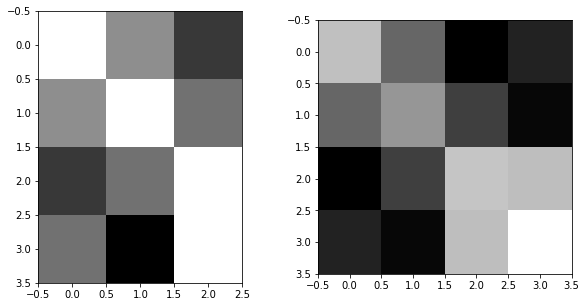

In [33]:
fig, ax=plt.subplots(1,2,figsize=(10,5))
corr_mat= np.array([[1.0, 0.6, 0.3],
                    [0.6, 1.0, 0.5],
                    [0.3, 0.5, 1.0],
                   [0.5, 0.1, 1.0]])
ax[0].imshow(corr_mat,cmap=cm.binary_r)
ax[1].imshow(np.cov(corr_mat),cmap=cm.binary_r)

In [34]:
np.cov(corr_mat)

array([[ 0.12333333,  0.01      , -0.12      , -0.07666667],
       [ 0.01      ,  0.07      , -0.04      , -0.11      ],
       [-0.12      , -0.04      ,  0.13      ,  0.12      ],
       [-0.07666667, -0.11      ,  0.12      ,  0.20333333]])

**协方差矩阵表征了变量自身的“能量”/“信息”和彼此的关联性**
假设样本中某个主要的维度A能代表原始数据，是“我们真正想看到的东西”，它本身含有的“能量”(即该维度的方差)，本来应该是很大的，但由于它与其他维度有千丝万缕的相关性，受到这些个相关维度的干扰，它的能量被削弱了，我们就希望通过PCA处理后，使维度A与其他维度的相关性尽可能减弱，进而恢复维度A应有的能量，让我们“看的更清楚”。

最直观的思路就是将协方差矩阵只保留对角线上的元素，将其他元素变成零，在矩阵变换中这种操作被称为矩阵的对角化，方法包括特征值分解和奇异值分解。

### PCA算法推导

$$
X = \left( \begin{array} { c c c c c } { - 1 } & { - 1 } & { 0 } & { 2 } & { 0 } \\ { - 2 } & { 0 } & { 0 } & { 1 } & { 1 } \end{array} \right)
$$

以X为例，我们用PCA方法将这两行数据降到一行。

- 去平均值(即去中心化)，即每一位特征减去各自的平均值
- 算协方差矩阵 $\frac{1}{n} XX^T $
- 用特征值分解方法求协方差矩阵$\frac{1}{n}XX^T$ 的特征值与特征向量
- 对特征值从大到小排序，选择其中最大的k个。然后将其对应的k个特征向量分别作为行向量组成特征向量矩阵P
- 将数据转换到k个特征向量构建的新空间中，即Y=PX

$$
C = \frac { 1 } { 5 } \left( \begin{array} { c c c c c } { - 1 } & { - 1 } & { 0 } & { 2 } & { 0 } \\ { - 2 } & { 0 } & { 0 } & { 1 } & { 1 } \end{array} \right) \left( \begin{array} { c c } { - 1 } & { - 2 } \\ { - 1 } & { 0 } \\ { 0 } & { 0 } \\ { 2 } & { 1 } \\ { 0 } & { 1 } \end{array} \right) = \left( \begin{array} { c c } { \frac { 6 } { 5 } } & { \frac { 4 } { 5 } } \\ { \frac { 4 } { 5 } } & { \frac { 6 } { 5 } } \end{array} \right)
$$

求解后的特征值为：
$$
\lambda _ { 1 } = 2 , \quad \lambda _ { 2 } = \frac { 2 } { 5 }
$$
对应的特征向量为：
$$
c _ { 1 } \left( \begin{array} { l } { 1 } \\ { 1 } \end{array} \right) , c _ { 2 } \left( \begin{array} { c } { - 1 } \\ { 1 } \end{array} \right)
$$
其中对应的特征向量分别是一个通解， c_{1} 和 c_{2} 可以取任意实数。那么标准化后的特征向量为:
$$
\left( \begin{array} { c } { \frac { 1 } { \sqrt { 2 } } } \\ { \frac { 1 } { \sqrt { 2 } } } \end{array} \right) , \left( \begin{array} { c } { - \frac { 1 } { \sqrt { 2 } } } \\ { \frac { 1 } { \sqrt { 2 } } } \end{array} \right)
$$
矩阵P为：
$$
P = \left( \begin{array} { c c } { \frac { 1 } { \sqrt { 2 } } } & { \frac { 1 } { \sqrt { 2 } } } \\ { - \frac { 1 } { \sqrt { 2 } } } & { \frac { 1 } { \sqrt { 2 } } } \end{array} \right)
$$
最后我们用P的第一行乘以数据矩阵X，就得到了降维后的表示:
$$
Y = \left( \begin{array} { c c } { \frac { 1 } { \sqrt { 2 } } } & { \frac { 1 } { \sqrt { 2 } } } \end{array} \right) \left( \begin{array} { c c c c c } { - 1 } & { - 1 } & { 0 } & { 2 } & { 0 } \\ { - 2 } & { 0 } & { 0 } & { 1 } & { 1 } \end{array} \right) = \left( \begin{array} { c c c c } { - \frac { 3 } { \sqrt { 2 } } } & { - \frac { 1 } { \sqrt { 2 } } } & { 0 } & { \frac { 3 } { \sqrt { 2 } } } & { - \frac { 1 } { \sqrt { 2 } } } \end{array} \right)
$$

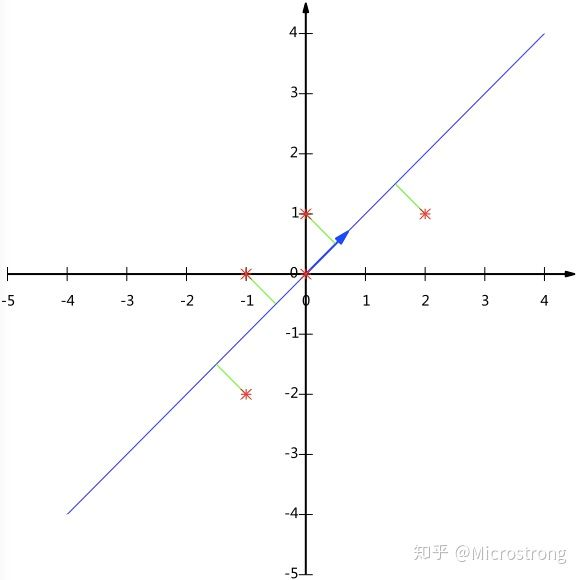

In [35]:
url = 'https://pic2.zhimg.com/80/v2-f5b0a7ae6d0b400e65220a02a0f0c1c1_hd.jpg'
IPython.display.Image(url, width = 500)

### 奇异值分解和应用

SVD英文是 Singular Value Decomposition，一般简称为 SVD。下面先给出它大概的意思：

对于任意一个$m \times n $的矩阵$M$，不妨假设$m > n$，它可以被分解为$M = UDV^{T}$

其中

- $U$ 是一个$m \times n$的矩阵，满足$U^{T}U = I_{n}$，$I_{n}$ 是$n \times n$的单位阵
- $V$ 是一个$n \times n$的矩阵，满足$V^{T}V = I_{n}$
- $D$ 是一个$n \times n$的对角矩阵，所有的元素都非负

上面这短短的三条可以引发出 SVD 许多重要的性质。</p>

<p>前面的表达式$M = UDV^{T}$可以用一种更容易理解的方式表达出来。如果我们把矩阵$U$用它的列向量表示出来，可以写成</p>

<p>$U = (u_1, u_2,\ldots, u_n)$</p>

<p>其中每一个$u_i$被称为$M$的左奇异向量。类似地，对于$V$，有</p>

<p>$V = (v_1,v_2,\ldots,v_n)$</p>

<p>它们被称为右奇异向量。再然后，假设矩阵$D$的对角线元素为$d_i$（它们被称为$M$的奇异值）并按降序排列，那么$M$就可以表达为</p>

$M = d_1u_1v_1^T + d_2u_2v_2^T + \cdots + d_nu_nv_n^T = \sum_{i=1}^n d_iu_iv_i^T = \sum_{i=1}^n A_i$

<p>其中$A_i = d_iu_iv_i^T$是一个$m \times n$的矩阵。换句话说，我们把原来的矩阵$M$表达成了$n$个矩阵的和。</p>

<p>这个式子有什么用呢？注意到，我们假定$d_i$是按降序排列的，它在某种程度上反映了对应项$A_i$在$M$中的“贡献”。$d_i$越大，说明对应的 $A_i$在$M$的分解中占据的比重也越大。所以一个很自然的想法是，我们是不是可以提取出$A_i$中那些对$M$贡献最大的项，把它们的和作为对 $M$的近似？也就是说，如果令</p>

<p>$ M_k = \sum_{i=1}^k A_i$</p>

<p>那么我们是否可以用$M_k$来对$M_n \equiv M$进行近似？</p>

<p>答案是肯定的，主成分分析就是这样做的。在主成分分析中，我们把数据整体的变异分解成若干个主成分之和，然后保留方差最大的若干个主成分，而舍弃那些方差较小的。事实上，主成分分析就是对数据的协方差矩阵进行了类似的分解（特征值分解），但这种分解只适用于对称的矩阵，而 SVD 则是对任意大小和形状的矩阵都成立。</p>

<p>主成分分析降维就是用几组低维的主成分来记录原始数据的大部分信息，这也可以认为是一种信息的（有损）压缩。在 SVD 中也可以做类似的事情，也就是用更少项的求和$M_k$来近似完整的$n$项求和。为什么要这么做呢？我们用一个图像压缩的例子来说明。</p>

<p>我们知道，电脑上的图像（特指位图）都是由像素点组成的，所以存储一张 1000×622 大小的图片，实际上就是存储一个 1000×622 的矩阵，共 622000 个元素。这个矩阵用 SVD 可以分解为 622 个矩阵之和，如果我们选取其中的前 100 个之和作为对图像数据的近似，那么只需要存储 100 个奇异值$d_i$，100 个$u_i$向量和 100 个$v_i$向量，共计 100×(1+1000+622)=162300个 元素，大约只有原始的 26% 大小

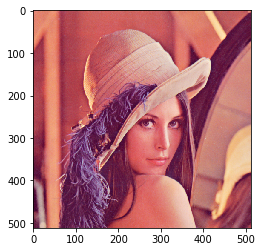

In [36]:
lena = imread('data/lena512color.tiff') 
imshow(lena)

In [37]:
def rebuild_img(u, sigma, v, p): #p表示奇异值的百分比
    #print (p)
    m = len(u)
    n = len(v)
    a = np.zeros((m, n))
    
    count = (int)(sum(sigma))
    curSum = 0
    k = 0
    while curSum <= count * p:
        uk = u[:, k].reshape(m, 1)
        vk = v[k].reshape(1, n)
        a += sigma[k] * np.dot(uk, vk)
        curSum += sigma[k]
        k += 1
    #print ('k:',k)
    a[a < 0] = 0
    a[a > 255] = 255
    #按照最近距离取整数，并设置参数类型为uint8
    return np.rint(a).astype("uint8")

In [38]:
reconstructed_img = {}
a = lena
for i in tqdm(range(1,11)):
    p = i/10
    u, sigma, v = np.linalg.svd(a[:, :, 0])
    R = rebuild_img(u, sigma, v, p)

    u, sigma, v = np.linalg.svd(a[:, :, 1])
    G = rebuild_img(u, sigma, v, p)

    u, sigma, v = np.linalg.svd(a[:, :, 2])
    B = rebuild_img(u, sigma, v, p)

    reconstructed_img[i] = np.stack((R, G, B), 2)

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

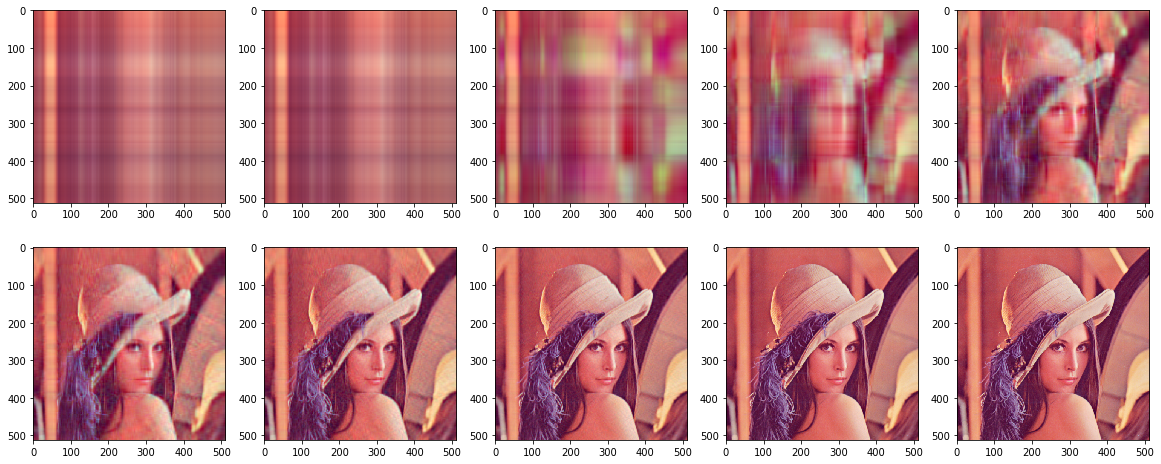

In [39]:
fig,ax=plt.subplots(2,5,figsize=(20,8))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(reconstructed_img[i*5+j+1])

### PCA 应用实例

In [40]:
rate_data = pd.read_csv('data/select_table_chn.csv',index_col=0)
rate_data.head()

,time-time-1,time-time-2,time-time-3,time-time-6,time-time-9,time-time-12,time-time-24,time-time-36,time-time-48,time-time-60,time-time-72,time-time-84,time-time-96,time-time-108,time-time-120,time-time-180,time-time-240,time-time-360,time-time-480,time-time-600
2009-01-12,0.699380,0.743332,0.779934,0.856910,0.901736,0.928920,0.987139,1.052588,1.138142,1.235478,1.337980,1.441578,1.543789,1.643081,1.738511,2.146167,2.443349,2.811115,3.014152,3.138549
2009-02-11,0.725367,0.789947,0.834435,0.905378,0.941824,0.973078,1.122887,1.290818,1.454963,1.609775,1.753983,1.887565,2.010948,2.124734,2.229589,2.642622,2.920239,3.248651,3.426417,3.534935
2009-03-11,0.576088,0.661456,0.706036,0.747687,0.764642,0.790476,0.956546,1.143724,1.324095,1.492842,1.649247,1.793675,1.926832,2.049518,2.162542,2.608169,2.907790,3.256717,3.435784,3.537773
2009-04-10,0.817144,0.819369,0.822557,0.837355,0.858956,0.886166,1.032639,1.208750,1.390005,1.564321,1.726429,1.874673,2.009216,2.131050,2.241471,2.664810,2.949379,3.296490,3.473091,3.549730
2009-05-11,0.631115,0.713559,0.767130,0.841994,0.873326,0.900470,1.050216,1.225990,1.398514,1.561130,1.712436,1.852479,1.981785,2.101042,2.210980,2.644694,2.935901,3.272815,3.443061,3.538167


In [41]:
input_mx = np.array(rate_data)

#### screen plot

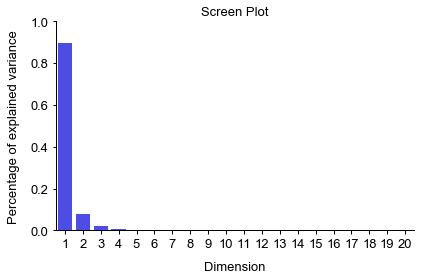

In [42]:
svd_solver = ['auto','full','arpack','randomized']
pca = PCA(svd_solver=svd_solver[0])
input_mx_ = StandardScaler().fit_transform(input_mx) #scale for columns
pca.fit(input_mx_)
#loadings = np.dot(np.diag(pca.singular_values_), pca.components_)
#how to reverse back: (X - np.mean(X, axis=0).reshape((1, -1))).dot(pca.components_.T)[0]

fig,ax=plt.subplots(figsize=(6,4))
plot_data = pd.DataFrame(np.concatenate((np.arange(1,pca.explained_variance_ratio_.shape[0]+1).reshape(-1,1).astype('int'),
                                         pca.explained_variance_ratio_.reshape(-1,1)),axis=1),columns=['Dimension','Percentage of explained variance'])
sns.barplot(data=plot_data,x='Dimension',y='Percentage of explained variance',color='blue',alpha=0.8)
ax=std_plot(ax,'Dimension','Percentage of explained variance','Screen Plot',
            xticklabel=np.arange(1,pca.explained_variance_ratio_.shape[0]+1),
            legendscale=False,legend_adj=False)
fig.tight_layout()
#embed_pdf_figure()

In [43]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

#### Loading matrix

In [44]:
def zeroMean(dataMat):      
    meanVal=np.mean(dataMat,axis=0)     #按列求均值，即求各个特征的均值
    newData=dataMat-meanVal
    return newData,meanVal
 
def pca_own(dataMat,n=None):
    if n==None:
        n = dataMat.shape[1]
    newData,meanVal=zeroMean(dataMat)
    covMat=np.cov(newData,rowvar=0)    #求协方差矩阵,return ndarray；若rowvar非0，一列代表一个样本，为0，一行代表一个样本
    
    eigVals,eigVects=np.linalg.eig(np.mat(covMat))#求特征值和特征向量,特征向量是按列放的，即一列代表一个特征向量
    eigValIndice=np.argsort(eigVals)            #对特征值从小到大排序
    n_eigValIndice=eigValIndice[-1:-(n+1):-1]   #最大的n个特征值的下标
    n_eigVect=eigVects[:,n_eigValIndice]        #最大的n个特征值对应的特征向量
    lowDDataMat=newData*n_eigVect               #低维特征空间的数据
    reconMat=(lowDDataMat*n_eigVect.T)+meanVal  #重构数据
    return lowDDataMat,reconMat,n_eigVect

lowDDataMat,pca_mx,loadings = pca_own(input_mx)


In [45]:
lowDDataMat.shape,pca_mx.shape

((124, 20), (124, 20))

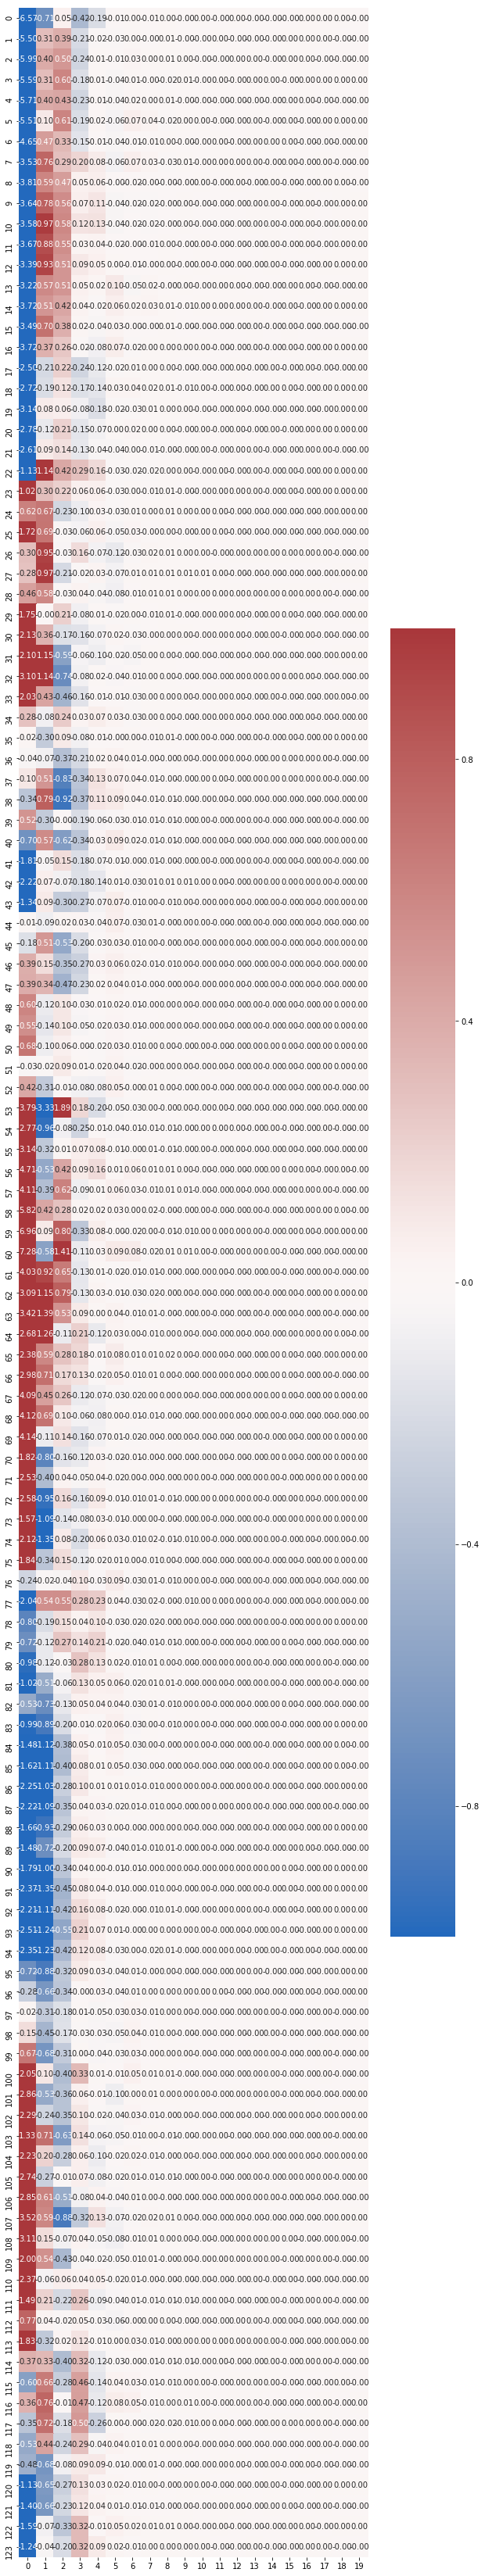

In [46]:
fig,ax=plt.subplots(figsize=(10,60))
sns.heatmap(lowDDataMat,ax=ax,vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='vlag')


In [47]:
reconstructed_img = {}
a = lena
for i in tqdm(range(1,11)):
    p = i*2/100
    print (p)
    dim_retain = int(a.shape[0] * p)
    reconstructed_img[i] = np.zeros([a.shape[0],a.shape[1],a.shape[2]])
    for j in range(a.shape[2]):
        _,reconstructed_img[i][:,:,j],_ = pca_own(a[:,:,j],dim_retain)
    reconstructed_img[i] = reconstructed_img[i].astype('int')
    reconstructed_img[i][reconstructed_img[i]<=0] = 0
    reconstructed_img[i][reconstructed_img[i]>=255] = 255

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

0.02
0.04
0.06
0.08
0.1
0.12
0.14
0.16
0.18
0.2



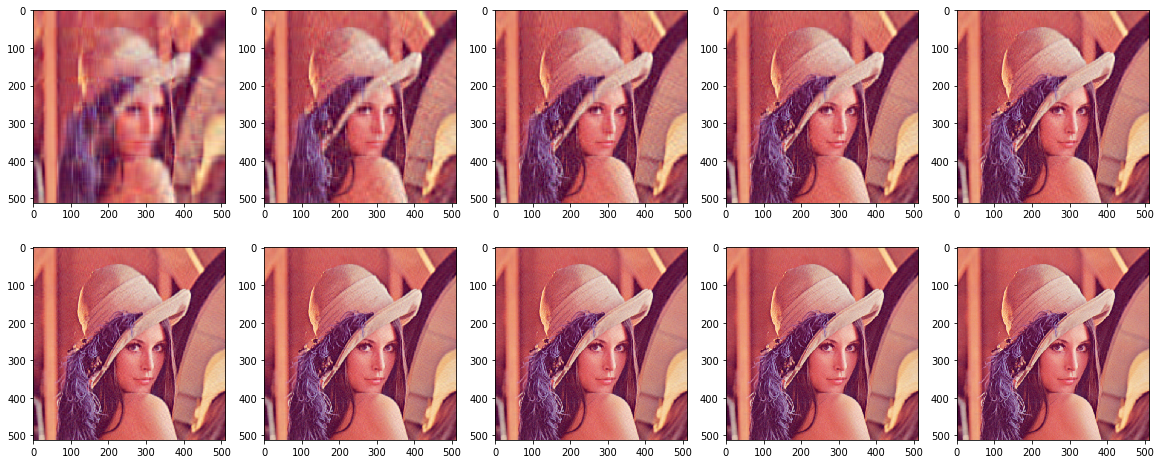

In [48]:
fig,ax=plt.subplots(2,5,figsize=(20,8))
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(reconstructed_img[i*5+j+1])

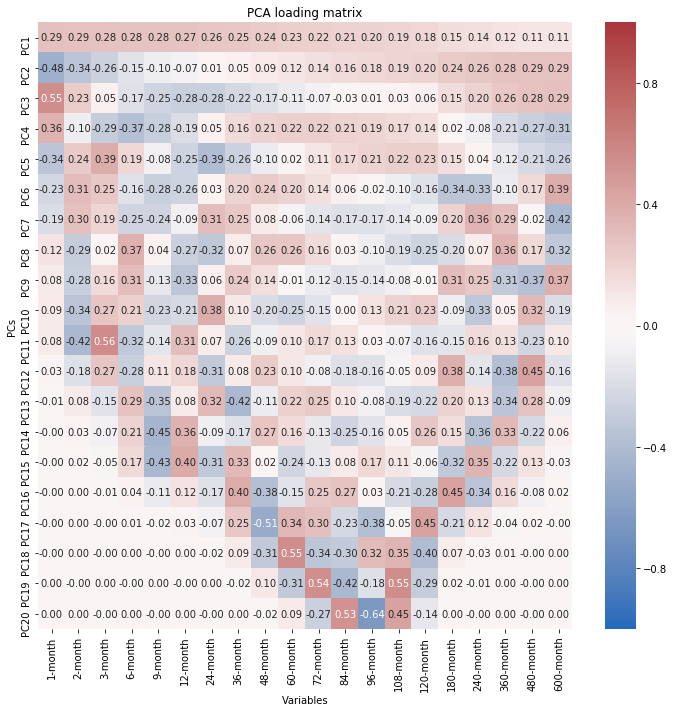

In [49]:
revise_columns = np.array([i.split('-')[2]+'-month' for i in rate_data.columns])
fig,ax=plt.subplots(figsize=(10,10))
#loadings_test = pca.components_*np.sqrt(pca.singular_values_)
sns.heatmap(loadings.T,ax=ax,vmin=-1, vmax=1, annot=True, fmt='.2f', cmap='vlag')
ax.set_title('PCA loading matrix')
ax.set_ylabel('PCs')
ax.set_xlabel('Variables')
ax.set_xticklabels(revise_columns,fontsize=10,rotation=90)
ax.set_yticklabels(np.array(['PC'+ str(i) for i in range(1,loadings.shape[0]+1)]))
fig.tight_layout()
#embed_pdf_figure()


#### PCA visualization

In [50]:
filled_markers = ('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')
fontlegend = {'family':'Arial',
                  'weight' : 'normal', 
                  'size' : 6.5*1}
def PCA_plot_sns(ax,data,sampleclass,method = 'Origin'):
    #X = log_transfrom(data).T
    X = StandardScaler().fit_transform(data.T)
    if method=='Origin':
        X_pca=X
    if method == 'PCA':
        transform = PCA()
        X_pca = transform.fit_transform(X)
    elif method == 'tSNE':
        transform = TSNE()
        X_pca = transform.fit_transform(X)
   
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index]),axis=1)
    plot_table.columns = ['dimension_1','dimension_2','class']
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]

    sns.scatterplot(ax=ax,data=plot_table,x="dimension_1", y="dimension_2",markers=filled_markers,
                    palette=legendhandle(np.unique(plot_table['class'])), hue="class",style="class",s=30,linewidth=0.01)
    
    std_plot(ax,'Dimension 1','Dimension 2',
             title=method, legendtitle='class',legendsort=False
             ,xbins=6,ybins=6
            )
    legend = ax.legend(prop=fontlegend,
     bbox_to_anchor=(1.2,0.9),framealpha=0,labelspacing=0.24)
    ax.legend_.get_frame()._linewidth=0
    fig.tight_layout()
    

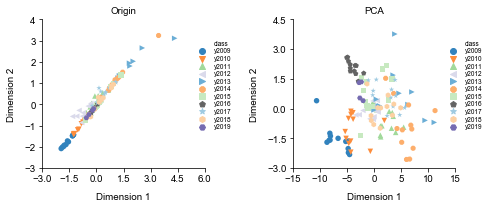

In [51]:
input_table = rate_data
year_class = pd.DataFrame(np.concatenate((np.array(input_table.index).reshape(-1,1),np.array(['y'+i.split('-')[0] for i in 
                                input_table.index]).reshape(-1,1)),axis=1),columns=['sample','label'])
year_class = year_class.set_index('sample').astype('str')
month_class = pd.DataFrame(np.concatenate((np.array(input_table.index).reshape(-1,1),np.array(['m'+i.split('-')[1] for i in 
                                input_table.index]).reshape(-1,1)),axis=1),columns=['sample','label'])
month_class = month_class.set_index('sample').astype('str')

fig, ax = plt.subplots(1,2,figsize=(7,3))
PCA_plot_sns(ax[0], input_table.T,year_class,'Origin')
PCA_plot_sns(ax[1], input_table.T,year_class,'PCA')
#embed_pdf_figure()

## t-SNE
https://www.jiqizhixin.com/articles/2017-11-13-7<br>
http://www.datakit.cn/blog/2017/02/05/t_sne_full.html<br>
http://bindog.github.io/blog/2016/06/04/from-sne-to-tsne-to-largevis/<br>
[t-SNE使用中的问题](http://bindog.github.io/blog/2018/07/31/t-sne-tips/)

In [52]:
IFrame('http://bindog.github.io/blog/2018/07/31/t-sne-tips/', width=800, height=450)

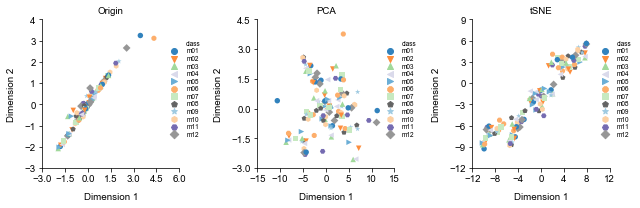

In [53]:
fig, ax = plt.subplots(1,3,figsize=(9,3))
PCA_plot_sns(ax[0],input_table.T,month_class,'Origin')
PCA_plot_sns(ax[1],input_table.T,month_class,'PCA')
PCA_plot_sns(ax[2],input_table.T,month_class,'tSNE')
fig.tight_layout()
#embed_pdf_figure()

# Matrix Processing: principles and plots

## environment

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from tqdm import tqdm, tqdm_notebook
import matplotlib.pyplot as plt
import seaborn as sns
import gc, argparse, sys, os, errno
from IPython.core.display import HTML,Image
from functools import reduce
import h5py
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
import scipy
import sklearn
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
from bokeh.io import output_notebook, show
output_notebook()
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
from sklearn.neighbors import NearestNeighbors
from bokeh.palettes import Category20c,Set3,Pastel2
from ipywidgets import interact,interactive, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
from IPython.core.display import HTML,Image
from matplotlib.backends.backend_pdf import PdfPages, PdfFile
from IPython.display import HTML, display, FileLink
from base64 import b64encode, b64decode
from io import StringIO, BytesIO
from contextlib import contextmanager

Populating the interactive namespace from numpy and matplotlib


Loading BokehJS ...

In [55]:
cd ~chenxupeng/projects/exSEEK_training/

/home/chenxupeng/projects/exSEEK_training


In [56]:
# setup figure template
figure_template_path = 'bin'
if figure_template_path not in sys.path:
    sys.path.append(figure_template_path)
from importlib import reload
import figure_template
# force reload of the module
reload(figure_template)
from figure_template import display_dataframe, embed_pdf_figure, embed_pdf_pages,std_plot

In [57]:
fontsize = 6.5
fontscale = 1
fontweight =  'normal'
fonttitle = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontticklabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlegend = {'family':'Arial',
                  'weight' : fontweight, 
              #'linewidth':0.5,
                  'size' : fontsize*fontscale}
fontcbarlabel = {'family':'Arial',
                 'weight' : fontweight, 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : fontsize*fontscale}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : fontweight, 
                 'size' : (fontsize-1)*fontscale}

def std_plot(ax,xlabel=None,ylabel=None,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=0.2,borderpad=0.2,handletextpad=0.2,legendsort=False,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True,rotation=None,xticklabel=None,legendscale=True,h=None,l=None,**kwards):
        # height = 2 font = 6.5
    def autoscale(fig):
        if isinstance(fig,matplotlib.figure.Figure):
            width,height = fig.get_size_inches()
        elif isinstance(fig,matplotlib.axes.Axes):
            width,height = fig.figure.get_size_inches()
        fontscale = height/2
        if width/fontscale > 8:
            warnings.warn("Please reset fig's width. When scaling the height to 2 in, the scaled width '%.2f' is large than 8"%(width/fontscale),UserWarning)
        return fontscale
    
    class fontprop:
        def init(self,fonttitle=None,fontlabel=None,fontticklabel=None,fontlegend=None,fontcbarlabel=None,fontcbarticklabel=None):
            self.fonttitle = fonttitle
            self.fontlabel = fontlabel
            self.fontticklabel = fontticklabel
            self.fontlegend = fontlegend
            self.fontcbarlabel = fontcbarlabel
            self.fontcbarticklabel = fontcbarticklabel
        def update(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']*fontscale
            self.fontlabel['size'] = self.fontlabel['size']*fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']*fontscale
            self.fontlegend['size'] = self.fontlegend['size']*fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']*fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']*fontscale
        def reset(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']/fontscale
            self.fontlabel['size'] = self.fontlabel['size']/fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']/fontscale
            self.fontlegend['size'] = self.fontlegend['size']/fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']/fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']/fontscale
    fontscale = autoscale(ax)
    font = fontprop()
    font.init(fonttitle,fontlabel,fontticklabel,fontlegend,fontcbarlabel,fontcbarticklabel)
    font.update(fontscale)
    
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    ax.set_ylabel(ylabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    if (rotation is not None) & (xticklabel is not None) :
        ax.set_xticklabels(xticklabel,fontticklabel,rotation=rotation)
    elif (xticklabel is not None) &(rotation is None):
        ax.set_xticklabels(xticklabel,fontticklabel)
    elif (xticklabel is None) &(rotation is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    elif (rotation is not None) & (xticklabel is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel,rotation=rotation)
    ax.set_yticklabels(ax.get_yticklabels(),font.fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_linewidth(0.5*fontscale)
    ax.spines['left'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2*fontscale,width=0.5*fontscale)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = font.fonttitle)
    if legendscale is True:
        if (h is None)&(l is None):
            legend = ax.legend(prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        else:
            legend = ax.legend(h,l,prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
    else:
        legend = ax.legend(handles=h,labels=l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3*fontscale,width=0*fontscale,length=0*fontscale)
        cbar.set_label(cbarlabel,fontdict = font.fontcbarlabel,Rotation=270,labelpad=fontscale*(fontsize+1))
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),font.fontcbarticklabel)
    font.reset(fontscale)
    return ax





In [58]:
savepath = '/home/chenxupeng/projects/exSEEK_training/'+'output/'+'fig3'+'/'

if not os.path.exists(savepath):
    os.mkdir(savepath)

## color

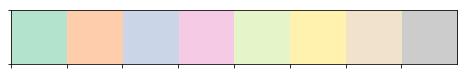

In [59]:
sns.palplot(Pastel2[8])

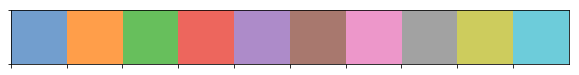

In [60]:
tableau10m = np.array([(114,158,206),(255,158,74),(103,191,92),(237,102,93),(173,139,201),
                       (168,120,110),(237,151,202),(162,162,162),(205,204,93),(109,204,218)])/255
sns.palplot(tableau10m)

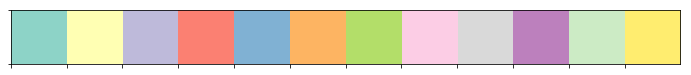

In [61]:
sns.palplot(Set3[12])

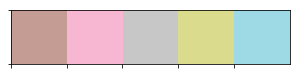

In [62]:
tableau10l5 = np.array([(196,156,148),(247,182,210),(199,199,199),(219,219,141),(158,218,229)])/255
sns.palplot(tableau10l5)

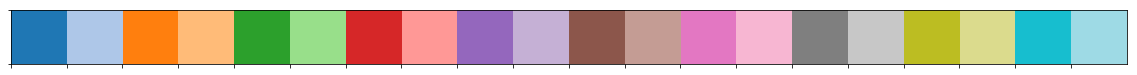

In [63]:
tableau20 = np.array([(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)])/255.
sns.palplot(tableau20)

In [64]:
def legendhandle(lists,porm=True,order=0):
    '''
        input: array,porm palette or marker
        palettesorder=0 dataset Category20c
        palettesorder=1 batch

        return a dic mapping levels of the hue variable to colors
        or return a dic mapping levels of the style variable to markers
        when use sns function, set palette=dic or markers=dic

    '''
    if porm == True:
        if order == 0:
            palette = np.array(Category20c[20]).reshape(4,-1).T.ravel()
        if order == 1:
            palette = Set3[12]
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=palette[i]
        return dic
    else:
        markerlist1 = ['v','^','<','>'] #triangle_down triangle_up triangle_left triangle_left
        markerlist2 = ['P','o','X','s'] #plus (filled) circle x (filled) square
        #markerlist3 = ['$CPM$','$CPM_top$','$RLE$','$TMM$']
        markerlist3 = ['$f$','$g$','$h$','$l$']
        markerlist3.sort()
        if order == 0:
            markers = markerlist2
        if order == 1:
            markers = markerlist1
        if order == 2:
            markers = markerlist3
            
        lists.sort()
        dic={}
        for i in range(len(lists)):
            dic[lists[i]]=markers[i]
        return dic       


In [65]:
tips = sns.load_dataset("tips")
legendhandle(np.unique(tips['smoker']),True,1)

{'No': '#8dd3c7', 'Yes': '#ffffb3'}

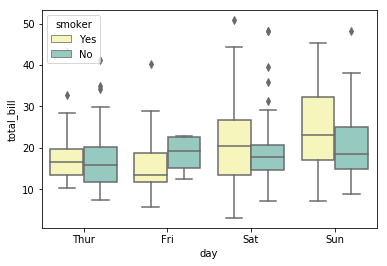

In [66]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette=legendhandle(np.unique(tips['smoker']),True,1))

In [67]:
legendhandle(np.unique(tips['smoker']),True,0)

{'No': '#3182bd', 'Yes': '#fd8d3c'}

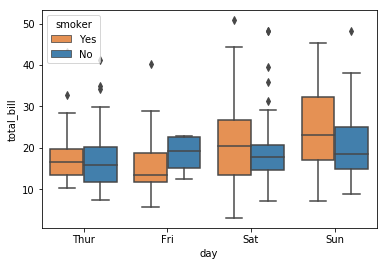

In [68]:
tips = sns.load_dataset("tips")
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette=legendhandle(np.unique(tips['smoker']),True,0))

In [69]:
A = ['Norm_RLE', 'Norm_RLE', 'Norm_RLE', 'Norm_RLE', 'Norm_CPM',
       'Norm_CPM', 'Norm_CPM', 'Norm_CPM', 'Norm_CPM_top', 'Norm_CPM_top',
       'Norm_CPM_top', 'Norm_CPM_top', 'Norm_TMM', 'Norm_TMM', 'Norm_TMM',
       'Norm_TMM']

In [70]:
A

['Norm_RLE',
 'Norm_RLE',
 'Norm_RLE',
 'Norm_RLE',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_CPM_top',
 'Norm_TMM',
 'Norm_TMM',
 'Norm_TMM',
 'Norm_TMM']

In [71]:
legendhandle(np.unique(A),False,2)

{'Norm_CPM': '$f$',
 'Norm_CPM_top': '$g$',
 'Norm_RLE': '$h$',
 'Norm_TMM': '$l$'}

## RLE

In [72]:
def plotRLE(mat,batch=None,label=None,logged=False,path=None,filename=None,title=None):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        fig,ax = plt.subplots(figsize=(2.8,2))
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.5,color='#D8D8D8'),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))  
        ax.annotate('variation score: %.2f'%score,xy=(mat_rle.shape[1]*0.6,-3),
                          fontfamily='Arial',fontsize=5.5)
        ax.set(xticks=[])
        std_plot(ax,'samples','Relative log expression',legendtitle='label',legendsort=False,title=title,ybins=4,bbox_to_anchor=(1.1,1.1),ylim=[-4,4])
    else:
        fig,ax = plt.subplots(figsize=(3.3,2))
        ax = sns.boxplot(x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'samples','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    #ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)
    fig.tight_layout()
    #embed_pdf_figure()
    #fig.savefig(path+filename)

In [73]:
normlist= ['filter.null.Norm_RLE','filter.null.Norm_CPM','filter.null.Norm_CPM_top',#'filter.null.Norm_null',
           #'filter.null.Norm_CPM_top_5','filter.null.Norm_CPM_top_10',
           #'filter.null.Norm_CPM_top_20','filter.null.Norm_CPM_top_40',
           'filter.null.Norm_TMM']
batchlist = ['Batch_ComBat_1','Batch_null','Batch_RUV','Batch_limma_1']

In [74]:
methodlist = []
for i in normlist:
    #for j in batchlist:
    j=batchlist[1]
    methodlist.append(i+'.'+j)
methodlist

['filter.null.Norm_RLE.Batch_null',
 'filter.null.Norm_CPM.Batch_null',
 'filter.null.Norm_CPM_top.Batch_null',
 'filter.null.Norm_TMM.Batch_null']

In [75]:
methodlist = ['filter.null.Norm_RLE.Batch_null']

In [76]:
class_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt',index_col=0)
class_info[class_info.dataset=='lulab_hcc']='GSE123972'


In [77]:
class_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
class_info[class_info.dataset=='lulab_hcc']='GSE123972'

In [78]:
methodlist

['filter.null.Norm_RLE.Batch_null']

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

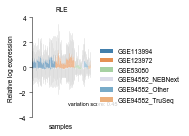

In [79]:
#titlelist=['CPM','CPM-top','RLE','TMM']
titlelist=['RLE']
j=0
for i in tqdm((methodlist)):
    table = pd.read_table('/home/xieyufeng/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    plotRLE(table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j])
    j=j+1
    

In [80]:
def plotRLE(mat,batch=None,label=None,logged=False,path=None,filename=None,title=None):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        fig,ax = plt.subplots(figsize=(2,2))
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.5,color='#D8D8D8'),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))  
        ax.annotate('variation score: %.2f'%score,xy=(mat_rle.shape[1]*0.4,-9),
                          fontfamily='Arial',fontsize=5.5)
        ax.set(xticks=[])
        std_plot(ax,'samples','Relative log expression',legendtitle='label',legendsort=False,title=title,ybins=4,bbox_to_anchor=(1.1,1.1))#,ylim=[-4,4])
    else:
        fig,ax = plt.subplots(figsize=(3.3,2))
        ax = sns.boxplot(x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'sample','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)
    fig.tight_layout()
    #embed_pdf_figure()
    #fig.savefig(path+filename)

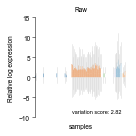

In [81]:
table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/count_matrix/mirna_and_domains.txt',
                           index_col=0)
plotRLE(table,batch=class_info,label='dataset',path=savepath,filename='RLE_noleg_{}.eps'.format('null'),title='Raw')

In [82]:
def plotRLE(ax,mat,batch=None,label=None,logged=False,path=None,filename=None,title=None,ylim=None,ylabel='',color='#E5E5E5'):
    """
    mat: DataFrame, expression matrix
    batch: DataFrame, optional, if given, batch.index must be contained in mat.columns
    label: One of batch.columns by which the samples are grouped in the figure
    """
    log_mat = mat if logged else np.log2(mat+1)
    feature_meds = log_mat.apply(np.median,1).tolist()
    for i in np.arange(len(feature_meds)):
        log_mat.iloc[i] = log_mat.iloc[i] - feature_meds[i]
    mat_rle = log_mat
    distance = 0
    for i in range(mat_rle.shape[1]):
        small,large = np.percentile(mat_rle.iloc[:,i], [25, 75])
        distance = distance+(large-small)**2
    score = distance/mat_rle.shape[1]
    stack = mat_rle.stack().reset_index()
    stack.rename(columns={stack.columns[2]:"counts", stack.columns[1]: "index"},inplace=True)
    #stack['class'] = None
    if batch is not None:
        batch.index.name = 'index'
        batch = batch[label].reset_index()
        stack = pd.merge(stack, batch, on=['index'])
        
        #ax = sns.boxplot(x='index',y='counts',data=stack.sort_values(by=label),fliersize=0,linewidth=0.1,width=1,hue=label,hue_order=np.unique(np.array(stack.loc[:,label])).sort(),dodge=False)
        ax = sns.boxplot(ax=ax,x='index',y='counts',data=stack.sort_values(by=label),
                     fliersize=0,linewidth=0,width=0.8,hue=label,
                     hue_order=np.unique(np.array(stack.loc[:,label])).sort(),
                     notch = True,showfliers=False,showmeans=False,showcaps=False,whiskerprops=dict(linewidth=0.4,color=color),
                     dodge=False,palette=legendhandle(np.unique(stack.dataset)))       
        ax.set(xticks=[])
        std_plot(ax,'Samples',ylabel,legendtitle='label',legendsort=False,title=title,ybins=4,ylim=ylim)
        ax.annotate('$variation\ score$: %.2f'%score,xy=(mat_rle.shape[1]*0.4,ax.get_ylim()[0]*0.9+ax.get_ylim()[1]*0.1),
                          fontfamily='Arial',fontsize=5.5)
    else:
        #fig,ax = plt.subplots(figsize=(3,2))
        ax = sns.boxplot(ax=ax,x='index',y='counts',data=stack,fliersize=0,linewidth=0.1,width=1,color='g')
        ax.set(xticks=[])
        std_plot(ax,'sample','RLE',legendtitle='label',legendsort=False,ylim=[-10,10],title=title,ybins=4)
    #ax.legend_.remove()
    legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.75))
    ax.legend_.get_frame()._linewidth=0
    ax.legend_.remove()
    ax.spines['bottom'].set_visible(False)

In [83]:
methodlist

['filter.null.Norm_RLE.Batch_null']

HBox(children=(IntProgress(value=0, max=1), HTML(value='')))

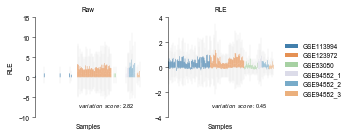

In [84]:
#titlelist=['RLE','CPM','CPM-top','TMM']
titlelist=['RLE']
fig,axes = plt.subplots(1,len(methodlist)+1,figsize=(5,2))
table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/count_matrix/mirna_and_domains.txt',
                           index_col=0)
plotRLE(axes[0],table,batch=class_info,label='dataset',path=savepath,filename='RLE_noleg_{}.eps'.format('null'),title='Raw',ylabel='RLE')
j=1    
for i in tqdm((methodlist)):
    table = pd.read_table('/home/xieyufeng/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    if j==1:
        plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j-1],ylim=[-4,4],ylabel='')
        axes[j].set_title('RLE',fontdict = fonttitle)
    else:
        if i=='filter.null.Norm_RLE.Batch_null':
            plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=i.split('.')[2],ylim=[-4,4],ylabel='',color='#B7B7B7')
            axes[j].set_title('RLE',fontdict = fonttitle,color='r')
        else: 
            plotRLE(axes[j],table,batch=class_info,label='dataset',path=savepath,filename='RLE_leg_big{}.eps'.format(i),title=titlelist[j-1],ylim=[-4,4],ylabel='')
        axes[j].set(yticks=[])
        axes[j].spines['left'].set_visible(False)
    j=j+1
j=j-1
h,l =axes[j].get_legend_handles_labels()
l=np.array(l)
l[l=='GSE94582_NEBNext']='GSE94582_1'
l[l=='GSE94582_Other']='GSE94582_2'
l[l=='GSE94582_TruSeq']='GSE94582_3'
l = l.tolist()
legend = axes[j].legend(h,l,prop=fontlegend,
              #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
              edgecolor="#000000",fancybox=False,bbox_to_anchor=(1.05, 0.8))
axes[j].legend_.get_frame()._linewidth=0
fig.tight_layout()
#fig.savefig(savepath+'demo.eps')
#embed_pdf_figure()


## heterogeneity

In [85]:
methodlist = ['filter.null.mirna_and_domains.txt',
              'filter.null.Norm_RLE.mirna_and_domains.txt',]
              #'filter.null.Norm_CPM.mirna_and_domains.txt',
              #'filter.null.Norm_CPM_top.mirna_and_domains.txt',
              #'filter.null.Norm_TMM.mirna_and_domains.txt']

In [86]:
ref = pd.read_table('/home/xieyufeng/exSeek/data/matrix_processing/ref_mirbase_gid.txt',header=-1)
batch_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt')
batch_info.columns=['sample_id','label']
batch_info['label'].iloc[np.where(batch_info.label=='lulab_hcc')]='GSE123972'

In [87]:
def heterogeneity(matlist=methodlist,class_info=batch_info,featurenum=4,featurename=None):
    def get_box_data(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        cat = boxName
        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]
        return group_data
    def find_x_position_box(boxPlotter, boxName):
        cat = boxName
        groupPos = boxPlotter.group_names.index(cat)
        return groupPos
    classname = np.unique(class_info.label)
    classname.sort()
    colormap = pd.DataFrame(np.array([classname,tableau10m[:len(np.unique(class_info.label))].tolist()]))
    colormap = colormap.T
    colormap.columns=['label','color']
    class_info = class_info.drop(np.where(class_info.label=='GSE123972')[0]).drop(np.where(class_info.label=='GSE94582')[0]).set_index('sample_id').reset_index()
    samplemin = np.unique(class_info.label,return_counts=True)[1].min()
    new_class_info = pd.DataFrame([])
    for i in unique(class_info.label):
        extra_class_info = class_info.iloc[np.where(class_info.label==i)]
        new_class_info = new_class_info.append(extra_class_info.sample(n=samplemin))
    new_class_info = new_class_info.sort_values(by=['label','sample_id']).set_index('sample_id').reset_index()
    flag = 0
    plot = pd.DataFrame()
    for matname in matlist:
        mat = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/matrix_processing/'\
                            +matname,index_col=0)
        mat = mat.loc[:,new_class_info.sample_id]
        data = np.log2(mat.iloc[np.where(np.isin([i.split('|')[0] for i in mat.index],ref))]+1)
        if flag == 0:
            featurelist = pd.DataFrame(data.sum(axis=1))
            featurelist.columns=['counts']
            ref_del = featurelist.sort_values(by='counts',ascending=False).index[:featurenum].tolist()
        data_del = data.loc[ref_del]
        stack = pd.DataFrame(data_del.stack())
        stack = stack.reset_index()
        stack.columns=['feature','sample_id','log2(count+1)']
        merge = pd.merge(stack,new_class_info,on=['sample_id'])
        merge['state'] = matname
        plot = plot.append(merge)
    plot['name_state']=[plot.feature.iloc[i].split('|')[0]+'|'+plot.state.iloc[i] for i in range(len(plot.feature))]
    #plot = plot.sort_values(by=['name_state'])
    plot = plot.set_index('feature').reset_index()
    for feature in np.unique(plot.feature):
        if (feature.split('|')[0]==featurename)|(featurename==None):
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            fig,ax = plt.subplots(figsize=(3,2))
            ylist=[0]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=data_sub_sub[label].color,hue=data_sub_sub[label].label,
                                  data=data_sub_sub[label],scale=0.2)
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymax = np.array(box_data).max()
                    y = ymax + yOffsetToBox
                    if y>=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]+h,ylist[loc]+h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]+h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
            ax.spines['bottom'].set_visible(False)
            ax.set_xticks([])
            #ax.legend(h,l,prop=fontlegend)
            #std_plot(ax,'','',legendtitle='label',legendsort=False,title=feature.split('|')[0])
            #ax.legend_.remove()
            std_plot(ax,'','Normalized counts',legendtitle='label',legendsort=False,title='Heterogeneity of '+feature.split('|')[0]+' expression')
            legend = ax.legend(prop=fontlegend,
                  #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,bbox_to_anchor=(1, 1.0),framealpha=0,markerscale=5)
            ax.legend_.get_frame()._linewidth=0
            #ax.legend_.remove()
            fig.tight_layout()
            #embed_pdf_figure()
            #fig.savefig(savepath+'{}_heterogeneity_noleg_2.eps'.format(feature.split('|')[0]))
#heterogeneity()

,mean_var,var_mul
RLE,0.003148,0.169333
Raw,0.070561,2.561851


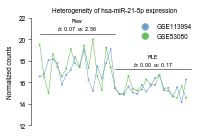

In [88]:
heterogeneity(featurename='hsa-miR-21-5p')

,mean_var,var_mul
RLE,1.674271,1.763357
Raw,0.847207,3.968411


,mean_var,var_mul
RLE,1.322367,0.908526
Raw,0.613129,2.011876


,mean_var,var_mul
RLE,0.000678,0.600351
Raw,0.121177,3.624232


,mean_var,var_mul
RLE,6.537353,1.353229
Raw,4.790814,1.852272


,mean_var,var_mul
RLE,0.652947,1.007926
Raw,0.196524,3.836019


,mean_var,var_mul
RLE,0.000026,0.115124
Raw,0.136194,2.860007


,mean_var,var_mul
RLE,0.068224,0.632499
Raw,0.403686,7.537659


,mean_var,var_mul
RLE,0.366544,1.242663
Raw,0.960586,9.386941


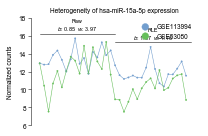

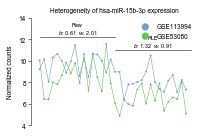

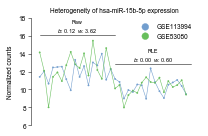

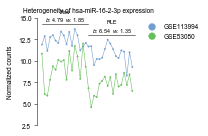

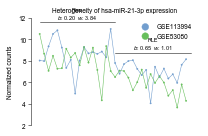

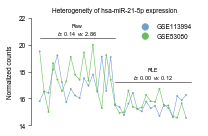

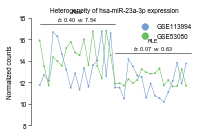

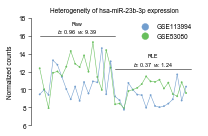

In [89]:
heterogeneity(featurenum=8)

In [90]:
def heterogeneity(matlist=methodlist,class_info=batch_info,featurenum=4,featurename1=None,featurename2=None):
    def get_box_data(boxPlotter, boxName):
        """
        boxName can be either a name "cat" or a tuple ("cat", "hue")
        Here we really have to duplicate seaborn code, because there is not direct access to the
        box_data in the BoxPlotter class.
        """
        cat = boxName
        i = boxPlotter.group_names.index(cat)
        group_data = boxPlotter.plot_data[i]
        return group_data
    def find_x_position_box(boxPlotter, boxName):
        cat = boxName
        groupPos = boxPlotter.group_names.index(cat)
        return groupPos
    classname = np.unique(class_info.label)
    classname.sort()
    colormap = pd.DataFrame(np.array([classname,tableau10m[:len(np.unique(class_info.label))].tolist()]))
    colormap = colormap.T
    colormap.columns=['label','color']
    class_info = class_info.drop(np.where(class_info.label=='GSE123972')[0]).drop(np.where(class_info.label=='GSE94582')[0]).set_index('sample_id').reset_index()
    samplemin = np.unique(class_info.label,return_counts=True)[1].min()
    new_class_info = pd.DataFrame([])
    for i in unique(class_info.label):
        extra_class_info = class_info.iloc[np.where(class_info.label==i)]
        new_class_info = new_class_info.append(extra_class_info.sample(n=samplemin))
    new_class_info = new_class_info.sort_values(by=['label','sample_id']).set_index('sample_id').reset_index()
    flag = 0
    plot = pd.DataFrame()
    for matname in matlist:
        mat = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/matrix_processing/'\
                            +matname,index_col=0)
        mat = mat.loc[:,new_class_info.sample_id]
        data = np.log2(mat.iloc[np.where(np.isin([i.split('|')[0] for i in mat.index],ref))]+1)
        if flag == 0:
            featurelist = pd.DataFrame(data.sum(axis=1))
            featurelist.columns=['counts']
            ref_del = featurelist.sort_values(by='counts',ascending=False).index[:featurenum].tolist()
        data_del = data.loc[ref_del]
        stack = pd.DataFrame(data_del.stack())
        stack = stack.reset_index()
        stack.columns=['feature','sample_id','log2(count+1)']
        merge = pd.merge(stack,new_class_info,on=['sample_id'])
        merge['state'] = matname
        plot = plot.append(merge)
    plot['name_state']=[plot.feature.iloc[i].split('|')[0]+'|'+plot.state.iloc[i] for i in range(len(plot.feature))]
    #plot = plot.sort_values(by=['name_state'])
    plot = plot.set_index('feature').reset_index()
    fig,ax = plt.subplots(figsize=(5,2))
    for feature in np.unique(plot.feature):
        if feature.split('|')[0]==featurename1:
            print(1)
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            
            ylist=[0]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                d=data_sub_sub[label]
                d.label = [ i+ '|' + featurename1 for i in d.label]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=d.color,hue=d.label,
                                  data=d,scale=0.5)
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymax = np.array(box_data).max()
                    y = ymax + yOffsetToBox
                    if y>=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            #display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]+h,ylist[loc]+h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]+h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
                
        if feature.split('|')[0]==featurename2:
            print(2)
            data_sub = plot.iloc[np.where(plot.feature == feature)]
            data_sub = data_sub.set_index('feature').reset_index()
            #colormap = pd.DataFrame(np.array([np.unique(data_sub.label),np.array(Category20c[20]).reshape(4,-1).T.ravel()[:len(np.unique(data_sub.label))].tolist()]))
            #colormap = colormap.T
            #colormap.columns=['label','color']
            #data_sub = data_sub.merge(colormap)
            data_sub = pd.merge(data_sub, colormap, how='left', on=['label'])
            ylist=[100]*len(matlist)
            data_sub_sub={}
            merge=pd.DataFrame()
            datasetprop=pd.DataFrame()
            for label in np.unique(data_sub.label):
                data_sub_sub[label] = data_sub.iloc[np.where(data_sub.label == label)]
                #data_sub_sub[label].to_csv('./'+label+'.txt',sep='\t')
                for i in np.unique(data_sub_sub[label].state):
                    a = data_sub_sub[label][data_sub_sub[label].state==i]
                    datasetprop.loc['var',i]=np.var(a['log2(count+1)'],ddof=1)
                    datasetprop.loc['mean',i]=np.mean(a['log2(count+1)'])
                #score['mean']=np.mean(a['log2(count+1)'])
                score = pd.DataFrame(datasetprop.stack()).reset_index()
                score['dataset']='GSE113994'
                merge = merge.append(score)


                data_sub_sub[label]['state_sample_id'] = [data_sub_sub[label].state.iloc[i]+'|'+\
                                                   str(i) for i in range(len(data_sub_sub[label]))]
                d = data_sub_sub[label]
                d.label = [ i+ '|' + featurename2 for i in d.label]
                sns.pointplot(ax=ax,x="state_sample_id", y="log2(count+1)",palette=d.color,hue=d.label,
                                  data=d,scale=0.5,linestyles='--',markers='X')
                #ax.scatter(data_sub_sub.state_sample_id.tolist(),data_sub_sub['log2(count+1)'].tolist(),color=data_sub_sub.color.tolist())
                boxPlotter = sns.categorical._BoxPlotter(data=data_sub_sub[label],x='state_sample_id',y='log2(count+1)',hue=data_sub_sub[label].label,
                                                         order=None, hue_order=None,
                                                             orient=None, width=.8, color=None, palette=None, saturation=.75,
                                                             dodge=True, fliersize=5, linewidth=None)
                linenum = len(matlist)
                start = ax.get_xticks()[0]
                binwidth = math.ceil((ax.get_xticks()[0]+ax.get_xticks()[-1])/linenum)
                for loc in range(linenum):
                    box = [boxPlotter.group_names[i] for i in range(start+loc*binwidth,start+(loc+1)*binwidth)]
                    box_data = []
                    for i in box:
                        box_data.append(get_box_data(boxPlotter, i)[0]) 
                    ylim = ax.get_ylim()
                    yRange = ylim[1] - ylim[0]
                    lineYOffsetAxesCoord = 0.05
                    lineYOffsetToBoxAxesCoord = 0.06
                    lineHeightAxesCoord=0.02
                    yOffset = lineYOffsetAxesCoord*yRange
                    yOffsetToBox = lineYOffsetToBoxAxesCoord*yRange

                    ymin = np.array(box_data).min()
                    y = ymin - yOffsetToBox
                    if y<=ylist[loc]:
                        ylist[loc]=y
            merge.rename(columns={merge.columns[0]:"prop", 
                      merge.columns[1]: "state",
                      merge.columns[2]: "value"},inplace=True)
            plotprop=pd.DataFrame()
            for i in np.unique(merge.state):
                b = merge[merge.state==i]
                mean = b[b.prop=='mean'].value
                mean_var=np.var(mean,ddof=1)
                var= b[b.prop=='var'].value
                mul = 1
                for item in var:
                    mul *= item
                plotprop.loc[i,'mean_var']=mean_var
                plotprop.loc[i,'var_mul']=mul
            plotprop=plotprop.rename(index={#'filter.null.Norm_CPM.mirna_and_domains.txt':'CPM',
                      #'filter.null.Norm_CPM_top.mirna_and_domains.txt':'CPM-top',
                      'filter.null.Norm_RLE.mirna_and_domains.txt':'RLE',
                      #'filter.null.Norm_TMM.mirna_and_domains.txt':'TMM',
                      'filter.null.mirna_and_domains.txt':'Raw'})
            #display(plotprop)
            h = lineHeightAxesCoord*yRange
            #title = [i.split('.')[2] for i in matlist]
            #title = ['Raw' if x == 'mirna_and_domains' else x for x in title]  
            #title = ['Raw','RLE','CPM','CPM-top','TMM']
            title = ['Raw','RLE']
            for loc in range(linenum):
                lineX, lineY = [start+loc*binwidth,start+(loc+1)*binwidth], [ylist[loc]-h,ylist[loc]-h]
                ax.plot(lineX, lineY,color='Black',linewidth='0.5')
                ax.annotate(title[loc]+'\n'+'$b$: '+'%.2f'%(plotprop.loc[title[loc],'mean_var'])+'  $w$: '+'%.2f'%(plotprop.loc[title[loc],'var_mul']), 
                            xy=(np.mean([start+loc*binwidth,start+(loc+1)*binwidth]), ylist[loc]-20*h),
                          xytext=(0, 1), textcoords='offset points',
                          xycoords='data', ha='center', va='bottom', fontfamily='Arial',fontsize=5.5,
                          clip_on=False, annotation_clip=False)
                
    ax.spines['bottom'].set_visible(False)
    ax.set_xticks([])
    #ax.legend(h,l,prop=fontlegend)
    #std_plot(ax,'','',legendtitle='label',legendsort=False,title=feature.split('|')[0])
    #ax.legend_.remove()
    std_plot(ax,'','Normalized counts',legendtitle='label',legendsort=False,title='Expression heterogeneity of reference genes')
    legend = ax.legend(prop=fontlegend,
          #labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
          edgecolor="#000000",fancybox=False,bbox_to_anchor=(1, 0.8),framealpha=0,markerscale=2)
    ax.legend_.get_frame()._linewidth=0
    #ax.legend_.remove()
    fig.tight_layout()
    #embed_pdf_figure()
    #fig.savefig(savepath+'{}_heterogeneity_noleg_2.eps'.format(feature.split('|')[0]))
#heterogeneity()

2
1


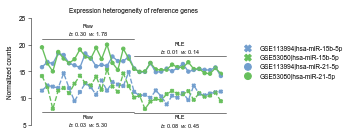

In [91]:
heterogeneity(featurename1='hsa-miR-21-5p',featurename2='hsa-miR-15b-5p')

## uca_knn

In [92]:
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes

def unsupervised_clustering_accuracy(y, y_pred):
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X)  
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score

def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score = uca_scores(X_, y_, prediction_algorithm)
    return uca_score

In [93]:
def knn_score(X, y, K=10):
    N = X.shape[0]
    assert K < N
    nn = NearestNeighbors(K)
    nn.fit(X)
    distances, indices = nn.kneighbors(X, K + 1)
    neighbor_classes = np.take(y, indices[:, 1:])
    same_class_fractions = np.sum(neighbor_classes == y[:, np.newaxis], axis=1)
    classes, counts = np.unique(y, return_counts=True)
    classes = np.argmax(y.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    counts = np.take(counts, classes)
    mean_r = K/(N - 1)*counts
    max_r = np.minimum(K, counts)
    #print (same_class_fractions.shape,mean_r.shape,max_r.shape)
    #scores = (np.mean(same_class_fractions) - mean_r)/(max_r - mean_r)
    scores = (same_class_fractions - mean_r)/(max_r - mean_r)
    #print(scores)
    return scores.mean()

def get_knn_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    knn_score_ = knn_score(X_, y_)
    return knn_score_

In [94]:
methodlist = []
for i in normlist:
    for j in batchlist:
        methodlist.append(i+'.'+j)
methodlist

['filter.null.Norm_RLE.Batch_ComBat_1',
 'filter.null.Norm_RLE.Batch_null',
 'filter.null.Norm_RLE.Batch_RUV',
 'filter.null.Norm_RLE.Batch_limma_1',
 'filter.null.Norm_CPM.Batch_ComBat_1',
 'filter.null.Norm_CPM.Batch_null',
 'filter.null.Norm_CPM.Batch_RUV',
 'filter.null.Norm_CPM.Batch_limma_1',
 'filter.null.Norm_CPM_top.Batch_ComBat_1',
 'filter.null.Norm_CPM_top.Batch_null',
 'filter.null.Norm_CPM_top.Batch_RUV',
 'filter.null.Norm_CPM_top.Batch_limma_1',
 'filter.null.Norm_TMM.Batch_ComBat_1',
 'filter.null.Norm_TMM.Batch_null',
 'filter.null.Norm_TMM.Batch_RUV',
 'filter.null.Norm_TMM.Batch_limma_1']

In [95]:
batch_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt',index_col=0)
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'
sampleclass = batch_info.iloc[:,0]
knn_list=[]
for i in tqdm(methodlist):
    table = pd.read_table('/home/xieyufeng/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    knn_list.append(get_knn_score(table,sampleclass))
knn_summary = pd.DataFrame(data={'preprocess_method':methodlist,'knn_score':list(knn_list)})
knn_summary = knn_summary.set_index('preprocess_method')

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

In [96]:
class_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt',index_col=0)
sampleclass = class_info
uca_list=[]
for i in tqdm(methodlist):
    table = pd.read_table('/home/xieyufeng/fig3/output/'+'cfRNA'+'/matrix_processing/'+i+'.mirna_and_domains.txt',
                           index_col=0)
    uca_list.append(get_uca_score(table,sampleclass))
uca_summary = pd.DataFrame(data={'preprocess_method':methodlist,'uca_score':list(uca_list)})
uca_summary = uca_summary.set_index('preprocess_method')

HBox(children=(IntProgress(value=0, max=16), HTML(value='')))

In [97]:
get_uca_score(table,sampleclass)

0.44360902255639095

In [98]:
from scipy.stats import pearsonr
pearsonr(uca_summary,knn_summary)

(array([0.14001261]), array([0.60503052]))

In [99]:
merge = pd.concat([knn_summary,uca_summary],axis=1)
merge['impute'] = [method.split('.')[1] for method in merge.index]
merge['normalization'] = [method.split('.')[2] for method in merge.index]
merge['batch'] = [method.split('.')[3] for method in merge.index]
sizelist=[10,50,200]
impute_list = np.unique(merge['impute'])
merge['imputation_size'] = merge['impute']
for i in np.arange(len(impute_list)):
    where = np.where(merge['imputation_size']==impute_list[i])
    for j in where:
        merge['imputation_size'].iloc[j]=sizelist[i]
merge.knn_score =1-merge.knn_score

In [100]:
merge = merge.drop(merge.iloc[np.where(np.array([i.split('.')[-1] for i in merge.index]) == 'Batch_RUVn_1')[0]].index)

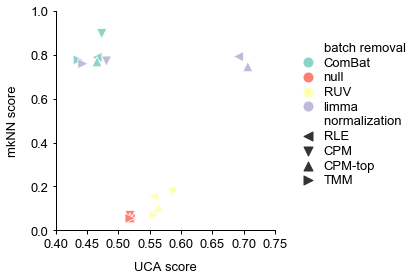

In [101]:
fig,ax=plt.subplots(figsize=(6,4))
ax = sns.scatterplot(x='uca_score',y='knn_score',data = merge,hue='batch',style='normalization',
                     markers=legendhandle(np.unique(merge.normalization),False,1),
                     palette=legendhandle(np.unique(merge.batch),True,1),s=100)
#"PCC score:{:.2f}".format(pearsonr(uca_summary,knn_summary)[0][0]))

h,l=ax.get_legend_handles_labels()
l = np.array(l)
l[l=='batch']='batch removal method'
l[l=='Batch_ComBat_1']='ComBat'
l[l=='Batch_null']='null'
l[l=='Batch_RUV']='RUV'
l[l=='Batch_limma_1']='limma'
l[l=='normalization']='normalization method'
l[l=='Norm_RLE']='RLE'
l[l=='Norm_CPM']='CPM'
l[l=='Norm_CPM_top']='CPM-top'
l[l=='Norm_TMM']='TMM'
l = l.tolist()

#ax.legend_.remove()
std_plot(ax,'UCA score','mkNN score',h=h,l=l,markerscale=1.5,bbox_to_anchor=(1.05, 0.9))
ax.legend_.get_frame()._linewidth=0
fig.tight_layout()
#fig.savefig(savepath+'uca_knn_binbin_leg.eps')
#embed_pdf_figure()

### understand UCA

In [102]:
def convert_label_to_int(sample_class):
    classes, counts = np.unique(sample_class, return_counts=True)
    classes = np.argmax(sample_class.reshape((-1, 1)) == classes.reshape((1, -1)), axis=1)
    return classes

def unsupervised_clustering_accuracy(y, y_pred):
    from sklearn.utils.linear_assignment_ import linear_assignment
    assert len(y_pred) == len(y)
    u = np.unique(np.concatenate((y, y_pred)))
    n_clusters = len(u)
    mapping = dict(zip(u, range(n_clusters)))
    reward_matrix = np.zeros((n_clusters, n_clusters), dtype=np.int64)
    for y_pred_, y_ in zip(y_pred, y):
        if y_ in mapping:
            reward_matrix[mapping[y_pred_], mapping[y_]] += 1
    cost_matrix = reward_matrix.max() - reward_matrix
    ind = linear_assignment(cost_matrix)
    return sum([reward_matrix[i, j] for i, j in ind]) * 1.0 / y_pred.size, ind

def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X) 
        print(labels_pred)
        print(np.unique(labels_pred,return_counts=True))
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score,unsupervised_clustering_accuracy(labels_int, labels_pred)[1]

def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score,ind = uca_scores(X_, y_, prediction_algorithm)



In [103]:
get_uca_score(table,sampleclass)

[2 1 1 2 2 2 1 1 1 1 1 2 0 2 1 1 2 2 2 2 2 2 1 2 1 1 2 2 0 1 2 2 0 0 0 0 0
 0 0 2 0 0 0 1 1 3 1 1 1 1 3 3 1 3 1 3 1 3 1 1 3 1 1 3 3 3 3 3 3 1 1 1 1 1
 1 1 3 3 1 1 1 3 3 1 1 1 3 1 1 3 1 1 1 3 3 1 1 3 1 3 1 1 3 3 3 3 1 1 1 1 3
 3 3 1 3 1 3 3 3 3 3 3 1 3 3 3 1 3 3 1 1 3 1]
(array([0, 1, 2, 3], dtype=int32), array([12, 60, 18, 43]))


In [104]:
labels = sampleclass.loc[table.columns.values].values.ravel() 
print(convert_label_to_int(labels))
print(np.unique(convert_label_to_int(labels),return_counts=True))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
(array([0, 1, 2, 3]), array([103,  16,  10,   4]))


In [105]:
def uca_scores(X,y, prediction_algorithm='knn'):
    from sklearn.metrics import adjusted_rand_score as ARI
    from sklearn.metrics import normalized_mutual_info_score as NMI
    from sklearn.metrics import silhouette_score
    from sklearn.mixture import GaussianMixture as GMM
    from sklearn.cluster import KMeans

    cluster_num = np.unique(y).shape[0]
    if prediction_algorithm == 'knn':
        labels_pred = KMeans(cluster_num, n_init=200).fit_predict(X) 
    elif prediction_algorithm == 'gmm':
        gmm = GMM(cluster_num)
        gmm.fit(X)
        labels_pred = gmm.predict(X)
    labels = y
    #asw_score = silhouette_score(X, labels)
    #nmi_score = NMI(labels, labels_pred)
    #ari_score = ARI(labels, labels_pred)
    labels_int = convert_label_to_int(labels)
    uca_score = unsupervised_clustering_accuracy(labels_int, labels_pred)[0]
    return uca_score,unsupervised_clustering_accuracy(labels_int, labels_pred)[1]
def get_uca_score(data,sampleclass,method_PCA = True,prediction_algorithm='knn'):
    X = np.log2(data + 0.001).T
    X = StandardScaler().fit_transform(X)
    if method_PCA == True:
        transform = PCA()
    else:
        transform = TSNE()
    X_pca = transform.fit_transform(X)
    X_, y_ = X_pca, sampleclass.loc[data.columns.values].values.ravel() 
    #knn_score_ = knn_score(X_, y_)
    uca_score,ind = uca_scores(X_, y_, prediction_algorithm)
    return ind
get_uca_score(table,sampleclass)

array([[0, 1],
       [1, 3],
       [2, 0],
       [3, 2]])

### understand mkNN

#### first alignment score

\begin{equation}
    \text{Alignment\ Score} = \frac{1}{k-\frac{k}{N}}(k-\overline{x})
\end{equation}

其中$k$是最近邻算法（k nearest-neighbors, kNN）的前$k$个最近邻，$\overline{x}$是样本周围的样本同属一个批次的数量的平均，$N$表示样本数。
当两个批次样本完全分开时，$k=\overline{x}$，$\text{Alignment\ Score}=0$；当两个批次样本完全混杂时，比例因子$\frac{1}{k-\frac{k}{N}}$作用下，$\text{Alignment\ Score}$接近1。
\pkg{exSeek}提出了适用于多种批次的mkNN指标\footnote{该指标由由史斌斌（\url{ltbyshi@gmail.com}）首次提出}。

#### mkNN

\begin{equation}
    \text{Alignment\ Score} = 1-\frac{\overline{x}-\frac{k}{N}}{k-\frac{k}{N}}
\end{equation}

\begin{equation}
    \text{mkNN}=1-\frac{1}{B} \sum_{b=1}^{B} \frac{\overline{x}_{b}-k N_{b} /(N-1)}{\min \left(k, N_{b}\right)-k N_{b} /(N-1)}
\end{equation}
其中，$b$表示批次，$B$为批次数量，$N_b$是批次$b$下样本的数量。批次效应越明显，该指标越接近0。

In [106]:
IFrame('https://drive.google.com/file/d/1yWvw3fwWeSSrBgmhz_uaC4oQ0wltkIge/preview',
      width=800,height=600)

## PCA

In [107]:
def PCA_plot_with_uca_score_sns(ax,data,sampleclass,batchinfo, method = 'PCA'):
    X = log_transform(data).T
    X = StandardScaler().fit_transform(X)
    if method == 'PCA':
        transform = PCA()
    elif method == 'tSNE':
        transform = TSNE()
    elif method == 'UMAP':
        transform = umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation')
    
    X_pca = transform.fit_transform(X)
    plot_table = pd.DataFrame(X_pca[:,:2])
    plot_table.index = data.columns
    plot_table = pd.concat((plot_table,sampleclass.loc[plot_table.index],batchinfo.loc[plot_table.index]),axis=1)
    plot_table.columns = ['Dimension 1','Dimension 2','class','batch']
    plot_table = plot_table.sort_values(by='batch')
    classnum = np.unique(plot_table.iloc[:,2]).shape[0]
    sns.scatterplot(ax=ax,data=plot_table,x="Dimension 1", y="Dimension 2",
                    palette=legendhandle(np.unique(plot_table.batch)) , hue="batch",style='class',s=50,linewidth=0.01)
    
    #plt.figure(linewidth=30.5)

        #legend.get_title().set_fontweight('normal')
        #legend.get_title().set_fontsize(6.5)
    #ax.legend(bbox_to_anchor = (1, 1))
    #ax.spines['right'].set_visible(False)
    #ax.spines['top'].set_visible(False)
    #uca_score = get_clustering_score(data, sampleclass)
    #ax.set_title(method_type + ': ' +'UCA = {:.3f}'.format(uca_score) +', ' + 'kBET = {:.3f}'.format(kbet_score))
    #ax.annotate('UCA score: {:.6f}'.format(uca_score),xy=(1,0),xycoords='data',size=6.5)
    #print('Alignment score: {}'.format(knn_score(X_pca, sampleclass.loc[data.columns.values].values.ravel() )))


def log_transform(data, small = 0.01):
    return np.log2(data + small)

In [108]:
fontsize = 6.5
fontscale = 1
fontweight =  'normal'
fonttitle = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontticklabel = {'family':'Arial',
                  'weight' : fontweight, 
                  'size' : fontsize*fontscale}
fontlegend = {'family':'Arial',
                  'weight' : fontweight, 
              #'linewidth':0.5,
                  'size' : fontsize*fontscale}
fontcbarlabel = {'family':'Arial',
                 'weight' : fontweight, 
                 #'Rotation' : 270,
                 #'labelpad' : 25,
                 'size' : fontsize*fontscale}
fontcbarticklabel = {'family':'Arial',#Helvetica
                 'weight' : fontweight, 
                 'size' : (fontsize-1)*fontscale}

def std_plot(ax,xlabel=None,ylabel=None,title=None,
             legendtitle=None,bbox_to_anchor=None,
             labelspacing=0.2,borderpad=0.2,handletextpad=0.2,legendsort=False,markerscale=None,
             xlim=None,ylim=None,
             xbins=None,ybins=None,
             cbar=None,cbarlabel=None,
             moveyaxis=False,sns=False,left=True,rotation=None,xticklabel=None,legendscale=True,h=None,l=None,**kwards):
        # height = 2 font = 6.5
    def autoscale(fig):
        if isinstance(fig,matplotlib.figure.Figure):
            width,height = fig.get_size_inches()
        elif isinstance(fig,matplotlib.axes.Axes):
            width,height = fig.figure.get_size_inches()
        fontscale = height/3
        if width/fontscale > 8:
            warnings.warn("Please reset fig's width. When scaling the height to 2 in, the scaled width '%.2f' is large than 8"%(width/fontscale),UserWarning)
        return fontscale
    
    class fontprop:
        def init(self,fonttitle=None,fontlabel=None,fontticklabel=None,fontlegend=None,fontcbarlabel=None,fontcbarticklabel=None):
            self.fonttitle = fonttitle
            self.fontlabel = fontlabel
            self.fontticklabel = fontticklabel
            self.fontlegend = fontlegend
            self.fontcbarlabel = fontcbarlabel
            self.fontcbarticklabel = fontcbarticklabel
        def update(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']*fontscale
            self.fontlabel['size'] = self.fontlabel['size']*fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']*fontscale
            self.fontlegend['size'] = self.fontlegend['size']*fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']*fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']*fontscale
        def reset(self,fontscale):
            self.fonttitle['size'] = self.fonttitle['size']/fontscale
            self.fontlabel['size'] = self.fontlabel['size']/fontscale
            self.fontticklabel['size'] = self.fontticklabel['size']/fontscale
            self.fontlegend['size'] = self.fontlegend['size']/fontscale
            self.fontcbarlabel['size'] = self.fontcbarlabel['size']/fontscale
            self.fontcbarticklabel['size'] = self.fontcbarticklabel['size']/fontscale
    fontscale = autoscale(ax)
    font = fontprop()
    font.init(fonttitle,fontlabel,fontticklabel,fontlegend,fontcbarlabel,fontcbarticklabel)
    font.update(fontscale)
    
    pyplot.draw()
    #plt.figure(linewidth=30.5)
    if xlim is not None:  
        ax.set(xlim=xlim)
    if ylim is not None:
        ax.set(ylim=ylim)
    #pyplot.draw()
    if xbins is not None:
        locator = MaxNLocator(nbins=xbins)
        locator.set_axis(ax.xaxis)
        ax.set_xticks(locator())
    if ybins is not None:
        locator = MaxNLocator(nbins=ybins)
        locator.set_axis(ax.yaxis)
        ax.set_yticks(locator())
    pyplot.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_yticks(ax.get_yticks())
    ax.set_xlabel(xlabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    ax.set_ylabel(ylabel,fontdict = font.fontlabel,labelpad=(fontsize-1)*fontscale)
    if (rotation is not None) & (xticklabel is not None) :
        ax.set_xticklabels(xticklabel,fontticklabel,rotation=rotation)
    elif (xticklabel is not None) &(rotation is None):
        ax.set_xticklabels(xticklabel,fontticklabel)
    elif (xticklabel is None) &(rotation is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel)
    elif (rotation is not None) & (xticklabel is None):
        ax.set_xticklabels(ax.get_xticklabels(),fontticklabel,rotation=rotation)
    ax.set_yticklabels(ax.get_yticklabels(),font.fontticklabel)

    if moveyaxis is True:
        #fontticklabel 
        ax.spines['left'].set_position(('data',0))
    ax.spines['left'].set_visible(left)
    ax.spines['right'].set_visible(not left)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_linewidth(0.5*fontscale)
    ax.spines['left'].set_linewidth(0.5*fontscale)
    ax.spines['bottom'].set_color('k')
    ax.spines['left'].set_color('k')
    ax.spines['right'].set_color('k')
    
    ax.tick_params(direction='out', pad=2*fontscale,width=0.5*fontscale)
    #ax.spines['bottom']._edgecolor="#000000"
    #ax.spines['left']._edgecolor="#000000"
    if title is not None:
        ax.set_title(title,fontdict = font.fonttitle)
    if legendscale is True:
        if (h is None)&(l is None):
            legend = ax.legend(prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        else:
            legend = ax.legend(h,l,prop=font.fontlegend,
                  bbox_to_anchor=bbox_to_anchor,
                  labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                  edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
    if legendtitle is not None:
        #if legendloc is None:
        #    legendloc="best"
        legend = ax.legend(title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)
        if legendsort is True:
            # h: handle l:label
            h,l = ax.get_legend_handles_labels()
            l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h,l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
        if sns is True:
            h,l = ax.get_legend_handles_labels()
            #l,h = zip(*sorted(zip(l,h), key=lambda t: int(t[0]))) 
            legend = ax.legend(h[1:],l[1:],title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
            ax.legend_.get_frame()._linewidth=0.5*fontscale
            legend.get_title().set_fontweight('normal')
            legend.get_title().set_fontsize(fontscale*fontsize)
    else:
        legend = ax.legend(handles=h,labels=l,title=legendtitle,prop=font.fontlegend,
                      bbox_to_anchor=bbox_to_anchor,
                      labelspacing=labelspacing,borderpad=borderpad,handletextpad=handletextpad,
                      edgecolor="#000000",fancybox=False,markerscale=markerscale,**kwards)
        ax.legend_.get_frame()._linewidth=0.5*fontscale
        legend.get_title().set_fontweight('normal')
        legend.get_title().set_fontsize(fontscale*fontsize)

    if cbar is not None:
        #locator, formatter = cbar._get_ticker_locator_formatter()
        #ticks, ticklabels, offset_string = cbar._ticker(locator, formatter)
        #cbar.ax.spines['top'].set_visible(False)
        #cbar.ax.spines['right'].set_visible(False)
        #cbar.ax.spines['bottom'].set_visible(False)
        #cbar.ax.spines['left'].set_visible(False)
        cbar.ax.tick_params(direction='out', pad=3*fontscale,width=0*fontscale,length=0*fontscale)
        cbar.set_label(cbarlabel,fontdict = font.fontcbarlabel,Rotation=270,labelpad=fontscale*(fontsize+1))
        cbar.ax.set_yticks(cbar.ax.get_yticks())
        cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),font.fontcbarticklabel)
    font.reset(fontscale)
    return ax





In [109]:
sample_class = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt', index_col=0)
batch_info = pd.read_table('/home/xieyufeng/fig3/data/cfRNA/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'


In [110]:
sample_class[sample_class.label=='Normal']='HD'
sample_class[sample_class.label!='HD']='HCC'

In [111]:
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt', index_col=0)
batch_info[batch_info.dataset=='lulab_hcc']='GSE123972'

In [112]:
kbet_table = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/select_preprocess_method/kbet_score/mirna_and_domains/summary.txt', index_col = 0)
uca_table = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/select_preprocess_method/uca_score/mirna_and_domains/summary.txt', index_col = 0)

In [113]:
kbet_table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/kbet_score/mirna_and_domains/summary.txt', index_col = 0)
uca_table = pd.read_table('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/uca_score/mirna_and_domains/summary.txt', index_col = 0)

In [114]:
knn_summary = pd.read_csv('/home/shibinbin/projects/exSeek-dev/output/cfRNA/select_preprocess_method/knn_score/mirna_and_domains/summary.txt',sep='\t')
knn_summary = knn_summary.set_index('preprocess_method')

In [115]:
fontsize

6.5

UCA = 0.692, mkNN = 0.712


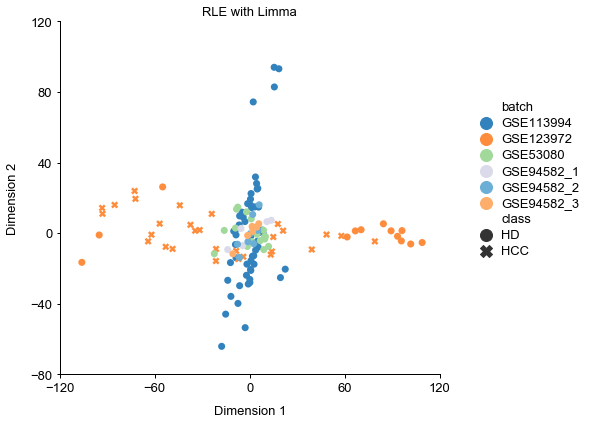

In [116]:
method = 'filter.null.Norm_RLE.Batch_limma_1'
data = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/matrix_processing/'+method+'.mirna_and_domains.txt',
                          index_col = 0)
fig, (ax,lax) = plt.subplots(ncols=2, gridspec_kw={"width_ratios":[4,1]},figsize=(8.5,6))
PCA_plot_with_uca_score_sns(ax,data,sample_class, batch_info,method='PCA')

h,l=ax.get_legend_handles_labels()
for loc in range(len(l)):
    if l[loc] == 'GSE94582_NEBNext':
        l[loc] = 'GSE94582_1'
    elif l[loc] == 'GSE94582_Other':
        l[loc] = 'GSE94582_2'
    elif l[loc] == 'GSE94582_TruSeq':
        l[loc] = 'GSE94582_3'
        
std_plot(ax,'Dimension 1','Dimension 2',
             title='RLE with Limma',
             xbins=4,ybins=5,h=h,l=l,bbox_to_anchor=(0.9,0.8),markerscale=1.5)
ax.legend_.remove()
lax.axis("off")
std_plot(lax,h=h,l=l,bbox_to_anchor=(1,0.8),markerscale=2,labelspacing=0.3)
lax.legend_.get_frame()._linewidth=0
fig.tight_layout()
#fig.savefig(savepath+'RLE with Limma.eps')
#embed_pdf_figure()
print('UCA = {:.3f}'.format(uca_summary.loc[method].values[0]) +', ' + 'mkNN = {:.3f}'.format(1-knn_summary.loc[method].values[0]))

In [117]:
knn_summary

,knn_score
preprocess_method,
filter.null.Norm_CPM_top.Batch_null_1,0.965693
filter.null.Norm_RLE.Batch_null_1,0.964789
filter.null.Norm_TMM.Batch_null_1,0.958972
filter.null.Norm_CPM.Batch_null_1,0.958100
filter.null.Norm_TMM.Batch_RUV_1,0.944290
filter.null.Norm_RLE.Batch_RUV_1,0.943549
filter.null.Norm_CPM_top.Batch_RUV_1,0.933820
filter.null.Norm_CPM.Batch_RUV_1,0.931906
filter.null.Norm_TMM.Batch_RUVn_1,0.727841


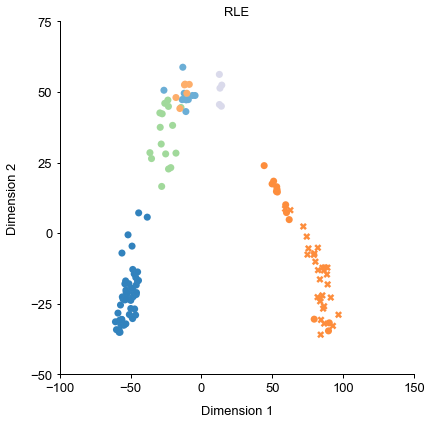

In [118]:
method = 'filter.null.Norm_RLE.Batch_null'
data = pd.read_table('/home/xieyufeng/fig3/output/cfRNA/matrix_processing/'+method+'.mirna_and_domains.txt',
                          index_col = 0)

fig, ax = plt.subplots(figsize=(6.1,6))
PCA_plot_with_uca_score_sns(ax,data,sample_class, batch_info,method='PCA')
std_plot(ax,'Dimension 1','Dimension 2',title='RLE',xbins=4,ybins=5)

ax.legend_.remove()
fig.tight_layout()
#fig.savefig(savepath+'RLE with Null_noleg.eps')
#embed_pdf_figure()
method = 'filter.null.Norm_RLE.Batch_null'
#print('UCA = {:.3f}'.format(uca_summary.loc[method].values[0]) +', ' + 'mkNN = {:.3f}'.format(1-knn_summary.loc[method].values[0]))

### variance explained

In [119]:
def var_ex(mat,anno_info):
    from scipy.stats import f
    def list201(array):
        dataframe = pd.DataFrame()
        for i in np.unique(array):
            dataframe[i] = array==i
        return dataframe

    rsquared_mat = pd.DataFrame()
    bms = pd.DataFrame()
    wms = pd.DataFrame()
    fvalue = pd.DataFrame()
    p = pd.DataFrame()
    rsquared_cutoff=pd.DataFrame()
    tss_all = (np.var(mat.T)*mat.shape[1]).tolist()
    var_list = anno_info.columns
    for var in var_list:
        anno = anno_info[var]
        if len(np.unique(anno))<=1:
            warnings.warn("ignoring '%s' with fewer than 2 unique levels"%var,UserWarning)
        keep = ~anno.isna()
        if np.all(keep):
            tss = tss_all
        else:
            anno = anno[keep]
            mat = mat.loc[:,keep]
            tss = np.array(np.var(mat.T)*mat.shape[1])
        anno2class = list201(anno)
        wss = 0
        for i in anno2class.columns:
            mat_select=mat.iloc[:,np.where(anno2class[i])[0]]
            wss = wss + np.array(np.var(mat_select.T)*mat_select.shape[1])
        #display(wss)
        rsquared_mat[var] = 1-wss/tss
        bms[var] = (tss-wss)/(anno2class.shape[1]-1)
        wms[var] = wss/(len(anno)-anno2class.shape[1])
        fvalue[var] = bms[var]/wms[var]
        p[var] = [1-f.cdf(i,anno2class.shape[1]-1,len(anno)-anno2class.shape[1]) for i in fvalue[var]]
        rsquared_cutoff[var] = [1-1/(f.isf(0.05, anno2class.shape[1]-1, len(anno)-anno2class.shape[1])*\
                               (anno2class.shape[1]-1)/(len(anno)-anno2class.shape[1])+1)]
    return rsquared_mat,rsquared_cutoff,p

In [120]:
batchinfo_path ="/home/xieyufeng/fig3/data/cfRNA/batch_info.txt"
batchinfo_path ="/home/xieyufeng/fig3/data/cfRNA/batch_info.txt"
classinfo_path = "/home/xieyufeng/fig3/data/cfRNA/sample_classes.txt"
mat1_path="/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_RLE.Batch_null.mirna_and_domains.txt"
mat2_path="/home/xieyufeng/fig3/output/cfRNA/matrix_processing/filter.null.Norm_RLE.Batch_limma_1.mirna_and_domains.txt"


In [121]:
mat1 = pd.read_csv(mat1_path,sep='\t')
mat2 = pd.read_csv(mat2_path,sep='\t')
batch_info = pd.read_csv(batchinfo_path,sep='\t')
batch_info = pd.read_table('/home/zhaotianxiao/fig3/batch_info.txt')
sample_info = pd.read_csv(classinfo_path,sep='\t')
anno_info = pd.merge(batch_info,sample_info,on=['sample_id'])
anno_info = anno_info.set_index('sample_id')
anno_info = anno_info.loc[mat1.columns]
#anno_info = anno_info.reset_index()
rsquared_mat1,rsquared_cutoff1,p1 = var_ex(mat1,anno_info)
anno_info = anno_info.loc[mat2.columns]
rsquared_mat2,rsquared_cutoff2,p2 = var_ex(mat2,anno_info)

TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

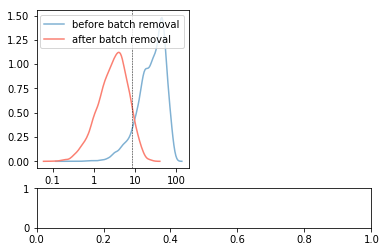

In [122]:
import matplotlib.gridspec as gridspec
def r2mat21class(rsquared_mat1=None,rsquared_mat2=None,rsquared_cutoff=rsquared_cutoff1,p1=None,p2=None):
    fig =plt.figure(figsize=(6,4))
    gs = gridspec.GridSpec(2, rsquared_mat1.shape[1],height_ratios=[4,1])
    #fig,(axes,lax)=plt.subplots(2,rsquared_mat1.shape[1],gridspec_kw={"height_ratios":[4,1]},figsize=(6,4))
    lax = fig.add_subplot(gs[1, :])
    pyplot.draw()
    for i in range(len(rsquared_mat1.columns)):
        axes = fig.add_subplot(gs[0, i])
        var = rsquared_mat1.columns[i]
        plot_mat = pd.DataFrame([rsquared_mat1[var],rsquared_mat2[var]]).T
        plot_mat.columns=['before batch removal','after batch removal']
        cutoff = rsquared_cutoff[var].iloc[0]
        #axes[i].set_xscale('log',subsx=[-2,-1,0,1,2])
        #axes[i].hist(plot_mat.before,500,density=1)
        sns.kdeplot(plot_mat['before batch removal'],ax=axes,c='#80b1d3')#,bw=0.001,kernel='gau')
        sns.kdeplot(plot_mat['after batch removal'],ax=axes,c='#fb8072')#,bw=0.001)
        axes.axvline(x=cutoff,linestyle='--',linewidth=0.5,c='k')
        axes.set_xticks([-2,-1,0,1,2])#,cutoff])
        axes.set_xticklabels([0.01,0.1,1,10,100])#,'%.1f'%math.pow(10,cutoff)])
        ymax,ymin = max(axes.get_yticks()),min(axes.get_yticks())
        axes.annotate('%.2f'%math.pow(10,cutoff),xy=(cutoff+0.1,0.05*ymin+0.95*ymax),fontfamily='Arial',fontsize=6.5*autoscale(fig))
        axes.legend(title='state',prop=fontlegend)
        if i==0:
            if var=='dataset':
                std_plot(axes,'Variance explained%','Density',legendtitle='state',legendsort=False,title='Batches',xlim=[-2,2],bbox_to_anchor=(1, 0.75))
            elif var=='label':
                std_plot(axes,'Variance explained%','Density',legendtitle='state',legendsort=False,title='Cancer/Normal',xlim=[-2,2],bbox_to_anchor=(1, 0.75))
        else:
            if var=='dataset':
                std_plot(axes,'Variance explained%','',legendtitle='state',legendsort=False,title='Batches',xlim=[-2,2],bbox_to_anchor=(1,-0.2))
            elif var=='label':  
                std_plot(axes,'Variance explained%','',legendtitle='state',legendsort=False,title='Cancer/Normal',xlim=[-2,2],bbox_to_anchor=(1,-0.3),ncol=2)
        axes.legend_.get_frame()._linewidth=0
        #axes[i].legend(title='s',prop=fontlegend)
        
        p_mat = pd.DataFrame([p1[var],p2[var]]).T
        p_mat.columns=['before','after']
        #display(p_mat)
        #table = axes[i].table(cellText=np.array([np.int_(np.sum(p_mat<0.05)),
        #                           ['%.2f'%i for i in (np.sum(p_mat<0.05)/len(p_mat))]]),
        #         colLabels=['before','after'],rowLabels=['amount','percentage'],
        #                      colWidths=[0.3,0.3],
        #                      bbox=[0,0,0.5,0.35])
        #table.set_fontsize(6.5)
        if i != len(rsquared_mat1.columns)-1:
            axes.legend_.remove()
        #plt.subplots_adjust(left=0.4, bottom=0.4)
    #axes[-1].axis('off')
    lax.axis("off")
    h,l=axes.get_legend_handles_labels()
    axes.legend_.remove()
    std_plot(lax,h=h,l=l,bbox_to_anchor=(1,1),markerscale=2,labelspacing=0.3,ncol=2)
    fig.tight_layout() 
    #fig.savefig(savepath+'variance_explained.eps')
       
    #embed_pdf_figure()
r2mat21class(np.log10(rsquared_mat1*100),np.log10(rsquared_mat2*100),np.log10(rsquared_cutoff1*100),p1,p2)


In [ ]:
p_mat = pd.DataFrame([p1.label,p2.label]).T
p_mat.columns=['before','after']
np.sum(p_mat<0.01)
